# Installations

In [ ]:
# %cd "/content/download_model.sh"

# !chmod +x "/content/download_model.sh"
# !"/content/download_model.sh"

In [ ]:
pip install apex

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.8/709.8 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

# import pandas as pd

# books = pd.read_csv("/content/English-Hindi code-mixed parallel corpus.csv")

# print(books.head())
# print(books.columns)
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1


In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=51cb97ded60b2717672bf1e40128b934a211bd75d87c4ca8bceef49e46e073c8
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

# CM


In [ ]:
import torch
from transformers import MBartForConditionalGeneration, MBartTokenizer, Trainer, TrainingArguments
from datasets import load_dataset, Dataset
import pandas as pd

# Load dataset
ds = pd.read_csv("/content/English-Hindi code-mixed parallel corpus.csv")

# Split dataset into train and validation sets
train_size = int(0.8 * len(ds))
train_dataset = ds[:train_size]
val_dataset = ds[train_size:]

# Define tokenizer
tokenizer = MBartTokenizer.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# Define a function to preprocess the dataset
def preprocess_dataset(dataset):
    encoded_sentences = []
    for sentence in dataset['Sentence']:
        encoded_sentence = tokenizer(sentence, max_length=1024, truncation=True, padding="max_length", return_tensors="pt")
        encoded_sentences.append(encoded_sentence)
    return encoded_sentences

# Preprocess the datasets
train_dataset = preprocess_dataset(train_dataset)
val_dataset = preprocess_dataset(val_dataset)

# Convert the preprocessed datasets to Dataset objects
train_dataset = Dataset.from_dict({"input_ids": torch.cat([x["input_ids"] for x in train_dataset]),
                                   "attention_mask": torch.cat([x["attention_mask"] for x in train_dataset])})
val_dataset = Dataset.from_dict({"input_ids": torch.cat([x["input_ids"] for x in val_dataset]),
                                 "attention_mask": torch.cat([x["attention_mask"] for x in val_dataset])})

# Define model
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/results",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    logging_dir="/content/logs",
    logging_steps=100,
    evaluation_strategy="steps",
    save_steps=500,
)

# Define Trainer and train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
trainer.train()

# Save the fine-tuned model
model.save_pretrained("/content/hinglish_model")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


In [ ]:
print(train_dataset)

NameError: name 'train_dataset' is not defined

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments
import pandas as pd

# Load dataset
df = pd.read_csv("/content/English-Hindi code-mixed parallel corpus.csv")

# Split dataset into train and validation sets
train_size = int(0.8 * len(df))
train_dataset = df[:train_size]
val_dataset = df[train_size:]

# Tokenize the data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_data(data):
    tokenized_data = tokenizer(data["Sentence"].tolist(), padding=True, truncation=True, return_tensors="pt")
    tokenized_data["labels"] = torch.tensor(data["English_Translation"].tolist())
    return tokenized_data

train_tokenized = tokenize_data(train_dataset)
val_tokenized = tokenize_data(val_dataset)

# Define model
num_labels = 1  # Adjust based on the number of labels in your dataset
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

# Define training arguments
training_args = TrainingArguments(
    output_dir="/content/results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="/content/logs",
    logging_steps=100,
    evaluation_strategy="steps",
    save_steps=500,
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized,
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("/content/finetuned_bert_model")


ValueError: too many dimensions 'str'

# Other

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 11.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=348a90021e9b2c25d6defa270c08a2b10feac42081407b7a388ff6c39a2b6825
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

In [ ]:
# Navigate to the directory where your script is located
%cd "/content/download_model.sh"

# Grant execute permission to the script
!chmod +x "/content/download_model.sh"

# Run the script
!"/content/download_model.sh"

[Errno 20] Not a directory: '/content/download_model.sh'
/content
--2024-03-11 09:16:35--  https://storage.googleapis.com/ai2-mosaic-public/projects/mosaic-kgs/comet-atomic_2020_BART.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1507095346 (1.4G) [application/zip]
Saving to: ‘comet-atomic_2020_BART.zip’

comet-atomic_2020_B 100%[===================>]   1.40G  22.2MB/s    in 74s     

2024-03-11 09:17:49 (19.5 MB/s) - ‘comet-atomic_2020_BART.zip’ saved [1507095346/1507095346]

Archive:  comet-atomic_2020_BART.zip
   creating: comet-atomic_2020_BART/
  inflating: comet-atomic_2020_BART/added_tokens.json  
  inflating: comet-atomic_2020_BART/.DS_Store  
  inflating: __MACOSX/comet-atomic_2020_BART/._.DS_Store  
  inflating: comet-atomic_2020_BART/tokenizer_config.json 

In [ ]:
!nvidia-smi

Thu Mar 21 09:33:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# COMET

In [ ]:
import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer


def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i : i + n]


def trim_batch(
    input_ids,
    pad_token_id,
    attention_mask=None,
):
    """Remove columns that are populated exclusively by pad_token_id"""
    keep_column_mask = input_ids.ne(pad_token_id).any(dim=0)
    if attention_mask is None:
        return input_ids[:, keep_column_mask]
    else:
        return (input_ids[:, keep_column_mask], attention_mask[:, keep_column_mask])


def use_task_specific_params(model, task):
    """Update config with summarization specific params."""
    task_specific_params = model.config.task_specific_params

    if task_specific_params is not None:
        pars = task_specific_params.get(task, {})
        model.config.update(pars)


class Comet:
    def __init__(self, model_path, device):
        self.model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to(device)
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.device = device
        self.batch_size = 1

        # init params
        use_task_specific_params(self.model, "summarization")
        self.model.zero_grad()

    def generate(self, input_event, rel):
        query = "{} {} [GEN]".format(input_event, rel)

        with torch.no_grad():
            query = self.tokenizer(
                query, return_tensors="pt", truncation=True, padding="max_length"
            ).to(self.device)
            input_ids, attention_mask = trim_batch(
                **query, pad_token_id=self.tokenizer.pad_token_id
            )

            summaries = self.model.generate(
                input_ids=input_ids,
                attention_mask=attention_mask,
                decoder_start_token_id=None,
                num_beams=5,
                num_return_sequences=5,
            )

            dec = self.tokenizer.batch_decode(
                summaries,
                skip_special_tokens=True,
                clean_up_tokenization_spaces=False,
            )

            return dec

In [ ]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [ ]:
# Create a Translator object
translator = Translator()

# Text to be translated
text = "our bhai sirf entertainment keliye hai"

# Detect the language of the text
detected_lang = translator.detect(text).lang
print("Detected Language:", detected_lang)

# Translate the text to English
translated_text = translator.translate(text, src=detected_lang, dest='en')
print("Translated Text:", translated_text.text)


Detected Language: hi
Translated Text: Hour brother is only for entertainment


In [ ]:
import csv
import re
import pickle
import time
import pandas as pd
# from comet import Comet
import torch
import nltk
from sklearn.model_selection import train_test_split
nltk.download('punkt')

def preprocess_tweet(tweet):
    cleaned_tweet = re.sub(r'[@#]', '', tweet)
    cleaned_tweet = re.sub(r'[^\w\s]', '', cleaned_tweet)
    cleaned_tweet = cleaned_tweet.lower()
    cleaned_tweet = cleaned_tweet.replace('\n', ' ')
    return cleaned_tweet

relations=["xIntent","xEffect"]
word_pairs = {
    "it's": "it is",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "you'd": "you would",
    "you're": "you are",
    "you'll": "you will",
    "i'm": "i am",
    "they're": "they are",
    "that's": "that is",
    "what's": "what is",
    "couldn't": "could not",
    "i've": "i have",
    "we've": "we have",
    "can't": "cannot",
    "i'd": "i would",
    "i'd": "i would",
    "aren't": "are not",
    "isn't": "is not",
    "wasn't": "was not",
    "weren't": "were not",
    "won't": "will not",
    "there's": "there is",
    "there're": "there are",
}

def process_sent(sentence):
    sentence = sentence.lower()
    for k, v in word_pairs.items():
        sentence = sentence.replace(k, v)
    sentence = nltk.word_tokenize(sentence)
    return sentence

def get_commonsense(comet, item):
    cs_list = []
    input_event = " ".join(item)
    for rel in relations:
        cs_res = comet.generate(input_event, rel)
        # cs_res = [process_sent(item) for item in cs_res]
        cs_list.append(cs_res)
    return cs_list

def listToString(s):
    str1 = ""
    for i in range(len(s)):
        if i==0:
            str1+=s[i]
        else:
            str1=str1+" "+s[i]

    return str1

filename = "/content/BullyExplain (1).csv"

fields = []
rows = []

with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)

    print("Total no. of rows: %d"%(csvreader.line_num))

print('Field names are:' + ', '.join(field for field in fields))

# print('\nFirst 5 rows are:\n')
cnt=0
text_data=[]
data=[]
for row in rows:
    if len(row[1])>0:
        cnt+=1
        k=preprocess_tweet(row[0])
        # print(k)
        data.append(row)
        text_data.append(k)
        # label_data.append(row[1])
print(cnt)
n=len(text_data)
t=int(8*n/10)
v=int(0.05*n+t)
print(" ".join(data[0][1].split()))
# print(data[0])
# print(data[1])
# print(data[2])


for i in range(len(data)):
    data[i][1]=" ".join(data[i][1].split())


# print(data[0])

print(len(data))
# print(data[0])
newdata=[]
for i in range(len(data)):
    newlist=[]
    # print(data[i][1].split())
    for j in range(len(data[i][1].split())):
        if data[i][1].split()[j][0]=='@':
            continue
        else:
            newlist.append(data[i][1].split()[j])
    newdata.append(listToString(newlist))

# print(newdata[0])

for i in range(len(data)):
    data[i][1]=newdata[i]

# print(data[0][1])
# print(data[1][1])

for i in range(len(data)):
    data[i][0]=re.sub(r'http\S+', '', data[i][0])

# print(data[0])
# print(data[1])
newdata=[]
for i in range(len(data)):
    newdata.append(data[i])
for i in range(len(data)):
    # print(data[i])
    newdata[i]=data[i][1:3]
    newdata[i][2:]=data[i][-2:]

data=newdata

# data=data[:200]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

comet=Comet('mismayil/comet-bart-ai2',device)

sent=process_sent('i killed him in the afternoon')
cnt=0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Total no. of rows: 12366
Field names are:tweet, Bully_Label, Sentiment, Target, Explaine, 
6394
Bully
6394


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# Commons Sense Loop(!run)

In [ ]:
newdata=[]
for i in range(len(data)):
    if data[i][1]=='1':
        data[i][1]='Bully'
    else:
        data[i][1]='Non-Bully'
    t=data[i][2]
    data[i][1]=data[i][3]+' < '+data[i][2]+' > '+'< '+data[i][1]+' >'
    data[i]=data[i][:2]
    # print(data[i][0])
    print(i)
    # print(data[i])
    sent=text_data[i]
    tr=Translator();
    lang=tr.detect(t).lang
    if lang=='hi':
      tr_text=tr.translate(t,src=lang,dest='en')
      sent=process_sent(tr_text.text)
      # print("tr_text: ",tr_text.text)
    else:
      # print("undecteced: ",sent)
      sent=process_sent(t)
    CS=get_commonsense(comet,sent)
    # print('Intent: {}'.format(CS[0][0]))
    # print('Effect: {}'.format(CS[1][0]))
    data[i].append(CS[0][0]+' '+CS[1][0])
    # print("......",data[i])
    text_data[i]=text_data[i]+"<<"+CS[0][0]+'<<'+CS[1][0]
    # print(text_data[i])
    # print(f"{i} -> {data[i]}")

df = pd.DataFrame(data, columns = ['text', 'label','CS'])
train_data,test_data = train_test_split(df,test_size=0.1, random_state=11)
train_data,eval_data = train_test_split(train_data,test_size=0.05, random_state=11)
print(train_data.head())
print(eval_data.head())
print(test_data.head())





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total no. of rows: 12366
Field names are:tweet, Bully_Label, Sentiment, Target, Explaine, 
6394
Bully
6394


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

TypeError: sequence item 2: expected str instance, NoneType found

In [ ]:
for i in range(4267,len(data)):
    if data[i][1]=='1':
        data[i][1]='Bully'
    else:
        data[i][1]='Non-Bully'
    # t=data[i][2]
    # data[i][1]=data[i][3]+' < '+data[i][2]+' > '+'< '+data[i][1]+' >'
    # data[i]=data[i][:2]
    # print(data[i][0])
    print(i)
    # print(data[i])
    if text_data[i]=="":
      CS[0][0]="none"
      CS[1][0]="none"
    else:
      sent=text_data[i]
      tr=Translator();
      lang=tr.detect(text_data[i]).lang
      if lang=='hi':
        tr_text=tr.translate(text_data[i],src=lang,dest='en')
        sent=process_sent(tr_text.text)
        # print("tr_text: ",tr_text.text)
      else:
        # print("undecteced: ",sent)
        sent=process_sent(text_data[i])
      CS=get_commonsense(comet,sent)
      # print('Intent: {}'.format(CS[0][0]))
      # print('Effect: {}'.format(CS[1][0]))
      data[i].append(CS[0][0]+' '+CS[1][0])
    # print("......",data[i])
    text_data[i]=text_data[i]+"<<"+CS[0][0]+'<<'+CS[1][0]
    # print(text_data[i])
    # print(f"{i} -> {data[i]}")

df = pd.DataFrame(data, columns = ['text', 'label','CS'])
train_data,test_data = train_test_split(df,test_size=0.1, random_state=11)
train_data,eval_data = train_test_split(train_data,test_size=0.05, random_state=11)
print(train_data.head())
print(eval_data.head())
print(test_data.head())


4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466


AttributeError: 'Translator' object has no attribute 'raise_Exception'

# File_utils

In [ ]:
import copy
import fnmatch
import io
import json
import os
import re
import shutil
import sys
import tarfile
import tempfile
from collections import OrderedDict
from contextlib import contextmanager
from dataclasses import fields
from functools import partial, wraps
from hashlib import sha256
from pathlib import Path
from typing import Any, BinaryIO, Dict, Optional, Tuple, Union
from urllib.parse import urlparse
from zipfile import ZipFile, is_zipfile
import numpy as np
from tqdm.auto import tqdm
import requests
from filelock import FileLock

from transformers import __version__


def add_start_docstrings(*docstr):
    def docstring_decorator(fn):
        fn.__doc__ = "".join(docstr) + (fn.__doc__ if fn.__doc__ is not None else "")
        return fn

    return docstring_decorator


def add_start_docstrings_to_model_forward(*docstr):
    def docstring_decorator(fn):
        class_name = ":class:`~transformers.{}`".format(fn.__qualname__.split(".")[0])
        intro = "   The {} forward method, overrides the :func:`__call__` special method.".format(class_name)
        note = r"""

    .. note::
        Although the recipe for forward pass needs to be defined within this function, one should call the
        :class:`Module` instance afterwards instead of this since the former takes care of running the pre and post
        processing steps while the latter silently ignores them.
        """
        fn.__doc__ = intro + note + "".join(docstr) + (fn.__doc__ if fn.__doc__ is not None else "")
        return fn

    return docstring_decorator


def add_end_docstrings(*docstr):
    def docstring_decorator(fn):
        fn.__doc__ = fn.__doc__ + "".join(docstr)
        return fn

    return docstring_decorator
def add_start_docstrings_to_callable(*docstr):
    def docstring_decorator(fn):
        class_name = ":class:`~transformers.{}`".format(fn.__qualname__.split(".")[0])
        intro = "   The {} forward method, overrides the :func:`__call__` special method.".format(class_name)
        note = r"""

    .. note::
        Although the recipe for forward pass needs to be defined within
        this function, one should call the :class:`Module` instance afterwards
        instead of this since the former takes care of running the
        pre and post processing steps while the latter silently ignores them.
        """
        fn.__doc__ = intro + note + "".join(docstr) + (fn.__doc__ if fn.__doc__ is not None else "")
        return fn

    return docstring_decorator
def create_position_ids_from_input_ids(input_ids, padding_idx):
    """ Replace non-padding symbols with their position numbers. Position numbers begin at
    padding_idx+1. Padding symbols are ignored. This is modified from fairseq's
    `utils.make_positions`.

    :param torch.Tensor x:
    :return torch.Tensor:
    """
    # The series of casts and type-conversions here are carefully balanced to both work with ONNX export and XLA.
    mask = input_ids.ne(padding_idx).int()
    incremental_indices = torch.cumsum(mask, dim=1).type_as(mask) * mask
    return incremental_indices.long() + padding_idx


# Files (!run)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/BullyExplain (1).csv")

In [ ]:
df.head()

,tweet,Bully_Label,Sentiment,Target,Explaine,Unnamed: 5
0,#islamic #kuttiya @MamataOfficial ur pimps ki...,Bully,Negative,Religion,{islamic {kuttiya ur pimps {killed an 85 yrs o...,NaN
1,@Harpreetmandai6 @realSukhiChahal @BJP4Punjab ...,Bully,Negative,Organization,Jadd Bengal ch dastaar lah k {kuttiya si udo t...,NaN
2,@RanaAyyub Yaa u do fake shame no one cares we...,Bully,Negative,Religion,Yaa u do {fake {shame no one cares we cant acx...,NaN
3,@StanningRubina @disha11parmar Rubina supporte...,Bully,Negative,Gender,Rubina supporter talking about voice so funny ...,NaN
4,@aajtak Kuttiya k balatkar k paidais ko encoun...,Bully,Negative,Gender,{Kuttiya k {balatkar k {paidais ko {encounter ...,NaN


In [ ]:
df.head(30)

,tweet,Bully_Label,Sentiment,Target,Explaine,Unnamed: 5
0,#islamic #kuttiya @MamataOfficial ur pimps ki...,Bully,Negative,Religion,{islamic {kuttiya ur pimps {killed an 85 yrs o...,NaN
1,@Harpreetmandai6 @realSukhiChahal @BJP4Punjab ...,Bully,Negative,Organization,Jadd Bengal ch dastaar lah k {kuttiya si udo t...,NaN
2,@RanaAyyub Yaa u do fake shame no one cares we...,Bully,Negative,Religion,Yaa u do {fake {shame no one cares we cant acx...,NaN
3,@StanningRubina @disha11parmar Rubina supporte...,Bully,Negative,Gender,Rubina supporter talking about voice so funny ...,NaN
4,@aajtak Kuttiya k balatkar k paidais ko encoun...,Bully,Negative,Gender,{Kuttiya k {balatkar k {paidais ko {encounter ...,NaN
5,@ZeeNews Srm kro namard hinduo jo ab bhi is Ma...,Bully,Negative,Religion,{Srm kro {namard {hinduo jo ab bhi is {Mamta {...,NaN
6,@maliniagarwal @TwitterIndia @Cyberdost @Mumba...,Bully,Negative,Gender,s mother got {f*cked by {her daughters {boyfri...,NaN
7,@BhumiMishra9 Sanskari kuttiya hoti hi etna bh...,Non_bully,Neutral,Miscellaneous,Sanskari {kuttiya hoti hi etna bhukhi h,NaN
8,@narendra_garre @TheInk_News @bhupenderc19 @su...,Bully,Negative,Religion,Tera maa ne nahi {karna {band nale Sikh la {ku...,NaN
9,@KuttiParul Tum to mossy desriable qomn hain k...,Bully,Negative,Miscellaneous,Tum to mossy desriable qomn hain {kuttiya {tum...,NaN


In [ ]:
import pandas as pd
import re

import re

import re

def preprocess_tweet(tweet):
    # Remove unnecessary special characters
    cleaned_tweet = re.sub(r'[@#]', '', tweet)
    # Remove other special characters and punctuation
    cleaned_tweet = re.sub(r'[^\w\s]', '', cleaned_tweet)
    # Convert to lowercase
    cleaned_tweet = cleaned_tweet.lower()
    # Replace newline characters with spaces
    cleaned_tweet = cleaned_tweet.replace('\n', ' ')
    return cleaned_tweet



# Extract the "tweet" column
tweets = df['tweet'].astype(str)
n=len(text_data)
t=int(8*n/10)
v=int(0.05*n+t)

# Write the cleaned tweets into the file
with open("/content/traintextCMwithCS.txt", "w", encoding="utf-8") as file:
    for i in range(t):
        file.write(text_data[i]+"\n")
with open("/content/validtext.txt", "w", encoding="utf-8") as file:
    for i in range(t,v):
        file.write(text_data[i]+"\n")

with open("/content/testtext.txt", "w", encoding="utf-8") as file:
    for i in range(v,n):
        file.write(text_data[i]+"\n")

print("Cleaned tweets saved to 'traintextCMwithCS.txt'.")


labels = []
for index, row in df.iterrows():
    bully_label = str(row["Bully_Label"])
    sentiment = str(row["Sentiment"])
    target = str(row["Target"])
    explain = str(row["Explaine"])
    label_set = (bully_label, sentiment, target, explain)
    labels.append(label_set)

# Write labels to the file
with open("/content/trainCMlabelAndSSAndSpan.txt", "w", encoding="utf-8") as file:
    for i in range(t):
        # Join the labels with tabs and write to file
        file.write("\t".join(labels[i])+"\n")
with open("/content/validlabels.txt", "w", encoding="utf-8") as file:
    for i in range(t,v):
        # Join the labels with tabs and write to file
        file.write("\t".join(labels[i])+"\n")
with open("/content/testlabels.txt", "w", encoding="utf-8") as file:
    for i in range(v,n):
        # Join the labels with tabs and write to file
        file.write("\t".join(labels[i])+"\n")

print("Labels saved to 'trainCMlabelAndSSAndSpan.txt'.")


Cleaned tweets saved to 'traintextCMwithCS.txt'.
Labels saved to 'trainCMlabelAndSSAndSpan.txt'.


In [ ]:
with open("/content/traintextCMwithCS.txt", "r", encoding="utf-8") as file:
    print(file.readlines())

['islamic kuttiya mamataofficial  ur pimps killed an 85 yrs old mahila and raped a 24 yrs old mahila u will find the same fate gutter dirt\n', 'harpreetmandai6 realsukhichahal bjp4punjab capt_amarinder dgppunjabpolice bjp4india jadd bengal ch dastaar lah k kuttiya si udo thode legal rights aa gaye si samay sab da ek jeha nai rehnda hunkaar jutti de thalle aa jana jaldi hi besharam kise tha de\n', 'ranaayyub yaa u do fake shame no one cares we cant acxept more kuttiya pela ewaale aur 10 bacche paida krne waale u hv 57 countries send there  waise to bada oic me complaint kr rahe the ab lee b bolo waise b ur religion is terrorism \n', 'stanningrubina disha11parmar rubina supporter talking about voice so funny woh kuttiya ka awaaz itna ganda hai chi chi\n', 'aajtak kuttiya k balatkar k paidais ko encounter karo sale hi duo ko gali deta hai\n', 'zeenews srm kro namard hinduo jo ab bhi is mamta kuttiya ko vote dene ki soch rahe hi\n', 'maliniagarwal twitterindia cyberdost mumbaipolice mahacy

# The BART

In [ ]:
class BeamHypotheses(object):

    def __init__(self, n_hyp, max_len, length_penalty, early_stopping):
        """
        Initialize n-best list of hypotheses.
        """
        self.max_len = max_len - 1  # ignoring <BOS>
        self.length_penalty = length_penalty
        self.early_stopping = early_stopping
        self.n_hyp = n_hyp
        self.hyp = []
        self.worst_score = 1e9

    def __len__(self):
        """
        Number of hypotheses in the list.
        """
        return len(self.hyp)

    def add(self, hyp, sum_logprobs):
        """
        Add a new hypothesis to the list.
        """
        score = sum_logprobs / len(hyp) ** self.length_penalty
        if len(self) < self.n_hyp or score > self.worst_score:
            self.hyp.append((score, hyp))
            if len(self) > self.n_hyp:
                sorted_scores = sorted([(s, idx) for idx, (s, _) in enumerate(self.hyp)])
                del self.hyp[sorted_scores[0][1]]
                self.worst_score = sorted_scores[1][0]
            else:
                self.worst_score = min(score, self.worst_score)

    def is_done(self, best_sum_logprobs):
        """
        If there are enough hypotheses and that none of the hypotheses being generated
        can become better than the worst one in the heap, then we are done with this sentence.
        """
        if len(self) < self.n_hyp:
            return False
        elif self.early_stopping:
            return True
        else:
            return self.worst_score >= best_sum_logprobs / self.max_len ** self.length_penalty
def reorder_attn_buffer(attn_cache, beam_idx):
    """
    Reorder attention cache according to new beam indices.

    Args:
        attn_cache (Tensor): Attention cache to reorder.
        beam_idx (Tensor): Indices indicating the new order of beams.

    Returns:
        Tensor: Reordered attention cache.
    """
    return attn_cache.index_select(0, beam_idx)


In [ ]:
# coding=utf-8
# Copyright 2020 The Facebook AI Research Team Authors and The HuggingFace Inc. team.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""PyTorch BART model, ported from the fairseq repo."""
import logging
import math
import random
from typing import Dict, List, Optional, Tuple

import numpy as np
import torch
import torch.nn.functional as F
from torch import Tensor, nn
from transformers.activations import ACT2FN
from transformers import BartConfig
# from transformers.file_utils import add_start_docstrings, add_start_docstrings_to_callable
from transformers.modeling_utils import PreTrainedModel


logger = logging.getLogger(__name__)


BART_PRETRAINED_MODEL_ARCHIVE_LIST = [
    "facebook/bart-large",
    "facebook/bart-large-mnli",
    "facebook/bart-large-cnn",
    "facebook/bart-large-xsum",
    "facebook/mbart-large-en-ro",
    # See all BART models at https://huggingface.co/models?filter=bart
]


BART_START_DOCSTRING = r"""

    This model is a PyTorch `torch.nn.Module <https://pytorch.org/docs/stable/nn.html#torch.nn.Module>`_ sub-class. Use it as a regular PyTorch Module and
    refer to the PyTorch documentation for all matters related to general usage and behavior.

    Parameters:
        config (:class:`~transformers.BartConfig`): Model configuration class with all the parameters of the model.
            Initializing with a config file does not load the weights associated with the model, only the configuration.
            Check out the :meth:`~transformers.PreTrainedModel.from_pretrained` method to load the model weights.

"""
BART_GENERATION_EXAMPLE = r"""
    Examples::

        from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
        # see ``examples/summarization/bart/evaluate_cnn.py`` for a longer example
        model = BartForConditionalGeneration.from_pretrained('bart-large-cnn')
        tokenizer = BartTokenizer.from_pretrained('bart-large-cnn')
        ARTICLE_TO_SUMMARIZE = "My friends are cool but they eat too many carbs."
        inputs = tokenizer.batch_encode_plus([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')
        # Generate Summary
        summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=5, early_stopping=True)
        print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids])

"""

BART_INPUTS_DOCSTRING = r"""
    Args:
        input_ids (:obj:`torch.LongTensor` of shape :obj:`(batch_size, sequence_length)`):
               Indices of input sequence tokens in the vocabulary. Use BartTokenizer.encode to produce them.
            Padding will be ignored by default should you provide it.
            Indices can be obtained using :class:`transformers.BartTokenizer.encode(text)`.
        attention_mask (:obj:`torch.Tensor` of shape :obj:`(batch_size, sequence_length)`, `optional`, defaults to :obj:`None`):
            Mask to avoid performing attention on padding token indices in input_ids.
            Mask values selected in ``[0, 1]``:
            ``1`` for tokens that are NOT MASKED, ``0`` for MASKED tokens.
        encoder_outputs (:obj:`tuple(tuple(torch.FloatTensor)`, `optional`, defaults to :obj:`None`):
            Tuple consists of (`last_hidden_state`, `optional`: `hidden_states`, `optional`: `attentions`)
            `last_hidden_state` of shape :obj:`(batch_size, sequence_length, hidden_size)`, `optional`, defaults to :obj:`None`) is a sequence of hidden-states at the output of the last layer of the encoder.
            Used in the cross-attention of the decoder.
        decoder_input_ids (:obj:`torch.LongTensor` of shape :obj:`(batch_size, target_sequence_length)`, `optional`, defaults to :obj:`None`):
            Provide for translation and summarization training. By default, the model will create this tensor by shifting the input_ids right, following the paper.
        decoder_attention_mask (:obj:`torch.BoolTensor` of shape :obj:`(batch_size, tgt_seq_len)`, `optional`, defaults to :obj:`None`):
            Default behavior: generate a tensor that ignores pad tokens in decoder_input_ids. Causal mask will also be used by default.
            If you want to change padding behavior, you should read :func:`~transformers.modeling_bart._prepare_decoder_inputs` and modify.
            See diagram 1 in the paper for more info on the default strategy
"""


def invert_mask(attention_mask):
    assert attention_mask.dim() == 2
    return attention_mask.eq(0)


def _prepare_bart_decoder_inputs(
    config, input_ids, decoder_input_ids=None, decoder_padding_mask=None, causal_mask_dtype=torch.float32
):
    """Prepare masks that ignore padding tokens in the decoder and a causal mask for the decoder if
    none are provided. This mimics the default behavior in fairseq. To override it pass in masks.
    Note: this is not called during generation
    """
    pad_token_id = config.pad_token_id
    if decoder_input_ids is None:
        decoder_input_ids = shift_tokens_right(input_ids, pad_token_id)
    bsz, tgt_len = decoder_input_ids.size()
    if decoder_padding_mask is None:
        decoder_padding_mask = make_padding_mask(decoder_input_ids, pad_token_id)
    else:
        decoder_padding_mask = invert_mask(decoder_padding_mask)
    causal_mask = torch.triu(fill_with_neg_inf(torch.zeros(tgt_len, tgt_len)), 1).to(
        dtype=causal_mask_dtype, device=decoder_input_ids.device
    )
    return decoder_input_ids, decoder_padding_mask, causal_mask



class PretrainedBartModel(PreTrainedModel):
    config_class = BartConfig
    base_model_prefix = "model"

    def _init_weights(self, module):
        std = self.config.init_std
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=std)
            if module.bias is not None:
                module.bias.data.zero_()
        elif isinstance(module, SinusoidalPositionalEmbedding):
            pass
        elif isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=std)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()

    @property
    def dummy_inputs(self):
        pad_token = self.config.pad_token_id
        input_ids = torch.tensor([[0, 6, 10, 4, 2], [0, 8, 12, 2, pad_token]], device=self.device)
        dummy_inputs = {
            "attention_mask": input_ids.ne(pad_token),
            "input_ids": input_ids,
        }
        return dummy_inputs


def _make_linear_from_emb(emb):
    vocab_size, emb_size = emb.weight.shape
    lin_layer = nn.Linear(vocab_size, emb_size, bias=False)
    lin_layer.weight.data = emb.weight.data
    return lin_layer


# Helper Functions, mostly for making masks
def _check_shapes(shape_1, shape2):
    if shape_1 != shape2:
        raise AssertionError("shape mismatch: {} != {}".format(shape_1, shape2))


def shift_tokens_right(input_ids, pad_token_id):
    """Shift input ids one token to the right, and wrap the last non pad token (usually <eos>)."""
    prev_output_tokens = input_ids.clone()
    index_of_eos = (input_ids.ne(pad_token_id).sum(dim=1) - 1).unsqueeze(-1)
    prev_output_tokens[:, 0] = input_ids.gather(1, index_of_eos).squeeze()
    prev_output_tokens[:, 1:] = input_ids[:, :-1]
    return prev_output_tokens


def make_padding_mask(input_ids, padding_idx=1):
    """True for pad tokens"""
    padding_mask = input_ids.eq(padding_idx)
    if not padding_mask.any():
        padding_mask = None
    return padding_mask


# Helper Modules


class EncoderLayer(nn.Module):
    def __init__(self, config: BartConfig):
        super().__init__()
        self.embed_dim = config.d_model
        self.output_attentions = config.output_attentions
        self.self_attn = SelfAttention(
            self.embed_dim, config.encoder_attention_heads, dropout=config.attention_dropout,
        )
        self.normalize_before = config.normalize_before
        self.self_attn_layer_norm = LayerNorm(self.embed_dim)
        self.dropout = config.dropout
        self.activation_fn = ACT2FN[config.activation_function]
        self.activation_dropout = config.activation_dropout
        self.fc1 = nn.Linear(self.embed_dim, config.encoder_ffn_dim)
        self.fc2 = nn.Linear(config.encoder_ffn_dim, self.embed_dim)
        self.final_layer_norm = LayerNorm(self.embed_dim)

    def forward(self, x, encoder_padding_mask):
        """
        Args:
            x (Tensor): input to the layer of shape `(seq_len, batch, embed_dim)`
            encoder_padding_mask (ByteTensor): binary ByteTensor of shape
                `(batch, src_len)` where padding elements are indicated by ``1``.
            for t_tgt, t_src is excluded (or masked out), =0 means it is
            included in attention

        Returns:
            encoded output of shape `(seq_len, batch, embed_dim)`
        """
        residual = x
        if self.normalize_before:
            x = self.self_attn_layer_norm(x)
        x, attn_weights = self.self_attn(
            query=x, key=x, key_padding_mask=encoder_padding_mask, need_weights=self.output_attentions
        )
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        if not self.normalize_before:
            x = self.self_attn_layer_norm(x)

        residual = x
        if self.normalize_before:
            x = self.final_layer_norm(x)
        x = self.activation_fn(self.fc1(x))
        x = F.dropout(x, p=self.activation_dropout, training=self.training)
        x = self.fc2(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        if not self.normalize_before:
            x = self.final_layer_norm(x)
        return x, attn_weights


class BartEncoder(nn.Module):
    """
    Transformer encoder consisting of *config.encoder_layers* self attention layers. Each layer
    is a :class:`EncoderLayer`.

    Args:
        config: BartConfig
    """

    def __init__(self, config: BartConfig, embed_tokens):
        super().__init__()

        self.dropout = config.dropout
        self.layerdrop = config.encoder_layerdrop
        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states

        embed_dim = embed_tokens.embedding_dim
        self.embed_scale = math.sqrt(embed_dim) if config.scale_embedding else 1.0
        self.padding_idx = embed_tokens.padding_idx
        self.max_source_positions = config.max_position_embeddings

        self.embed_tokens = embed_tokens
        # if config.static_position_embeddings:
        #     self.embed_positions = SinusoidalPositionalEmbedding(
        #         config.max_position_embeddings, embed_dim, self.padding_idx
        #     )
        # else:
        self.embed_positions = LearnedPositionalEmbedding(config.max_position_embeddings, embed_dim, self.padding_idx,)
        self.layers = nn.ModuleList([EncoderLayer(config) for _ in range(config.encoder_layers)])
        self.layernorm_embedding = LayerNorm(embed_dim) if config.normalize_embedding else nn.Identity()
        # mbart has one extra layer_norm
        self.layer_norm = LayerNorm(config.d_model) if config.normalize_before else None

    def forward(
        self, input_ids, attention_mask=None,
    ):
        """
        Args:
            input_ids (LongTensor): tokens in the source language of shape
                `(batch, src_len)`
            attention_mask (torch.LongTensor): indicating which indices are padding tokens.
        Returns:
            Tuple comprised of:
                - **x** (Tensor): the last encoder layer's output of
                  shape `(src_len, batch, embed_dim)`
                - **encoder_states** (List[Tensor]): all intermediate
                  hidden states of shape `(src_len, batch, embed_dim)`.
                  Only populated if *self.output_hidden_states:* is True.
                - **all_attentions** (List[Tensor]): Attention weights for each layer.
                During training might not be of length n_layers because of layer dropout.
        """
        # check attention mask and invert
        if attention_mask is not None:
            attention_mask = invert_mask(attention_mask)

        inputs_embeds = self.embed_tokens(input_ids) * self.embed_scale
        embed_pos = self.embed_positions(input_ids)
        x = inputs_embeds + embed_pos
        x = self.layernorm_embedding(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # B x T x C -> T x B x C
        x = x.transpose(0, 1)

        encoder_states, all_attentions = [], []
        for encoder_layer in self.layers:
            if self.output_hidden_states:
                encoder_states.append(x)
            # add LayerDrop (see https://arxiv.org/abs/1909.11556 for description)
            dropout_probability = random.uniform(0, 1)
            if self.training and (dropout_probability < self.layerdrop):  # skip the layer
                attn = None
            else:
                x, attn = encoder_layer(x, attention_mask)

            if self.output_attentions:
                all_attentions.append(attn)

        if self.layer_norm:
            x = self.layer_norm(x)
        if self.output_hidden_states:
            encoder_states.append(x)

        # T x B x C -> B x T x C
        encoder_states = [hidden_state.transpose(0, 1) for hidden_state in encoder_states]
        x = x.transpose(0, 1)

        return x, encoder_states, all_attentions


class DecoderLayer(nn.Module):
    def __init__(self, config: BartConfig):
        super().__init__()
        self.embed_dim = config.d_model
        self.output_attentions = config.output_attentions
        self.self_attn = SelfAttention(
            embed_dim=self.embed_dim, num_heads=config.decoder_attention_heads, dropout=config.attention_dropout,
        )
        self.dropout = config.dropout
        self.activation_fn = ACT2FN[config.activation_function]
        self.activation_dropout = config.activation_dropout
        self.normalize_before = config.normalize_before

        self.self_attn_layer_norm = LayerNorm(self.embed_dim)
        self.encoder_attn = SelfAttention(
            self.embed_dim,
            config.decoder_attention_heads,
            dropout=config.attention_dropout,
            encoder_decoder_attention=True,
        )
        self.encoder_attn_layer_norm = LayerNorm(self.embed_dim)
        self.fc1 = nn.Linear(self.embed_dim, config.decoder_ffn_dim)
        self.fc2 = nn.Linear(config.decoder_ffn_dim, self.embed_dim)
        self.final_layer_norm = LayerNorm(self.embed_dim)

    def forward(
        self,
        x,
        encoder_hidden_states,
        encoder_attn_mask=None,
        layer_state=None,
        causal_mask=None,
        decoder_padding_mask=None,
    ):
        residual = x

        if layer_state is None:
            layer_state = {}
        if self.normalize_before:
            x = self.self_attn_layer_norm(x)
        # Self Attention

        x, self_attn_weights = self.self_attn(
            query=x,
            key=x,
            layer_state=layer_state,  # adds keys to layer state
            key_padding_mask=decoder_padding_mask,
            attn_mask=causal_mask,
            need_weights=self.output_attentions,
        )
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        if not self.normalize_before:
            x = self.self_attn_layer_norm(x)

        # Cross attention
        residual = x
        assert self.encoder_attn.cache_key != self.self_attn.cache_key
        if self.normalize_before:
            x = self.encoder_attn_layer_norm(x)
        x, _ = self.encoder_attn(
            query=x,
            key=encoder_hidden_states,
            key_padding_mask=encoder_attn_mask,
            layer_state=layer_state,  # mutates layer state
        )
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        if not self.normalize_before:
            x = self.encoder_attn_layer_norm(x)

        # Fully Connected
        residual = x
        if self.normalize_before:
            x = self.final_layer_norm(x)
        x = self.activation_fn(self.fc1(x))
        x = F.dropout(x, p=self.activation_dropout, training=self.training)
        x = self.fc2(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = residual + x
        if not self.normalize_before:
            x = self.final_layer_norm(x)
        return (
            x,
            self_attn_weights,
            layer_state,
        )  # just self_attn weights for now, following t5, layer_state = cache for decoding


class BartDecoder(nn.Module):#_______________________________________________________________________________________
    """
    Transformer decoder consisting of *config.decoder_layers* layers. Each layer
    is a :class:`DecoderLayer`.
    Args:
        config: BartConfig
        embed_tokens (torch.nn.Embedding): output embedding
    """

    def __init__(self, config: BartConfig, embed_tokens: nn.Embedding):
        super().__init__()
        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states
        self.dropout = config.dropout
        self.layerdrop = config.decoder_layerdrop
        self.padding_idx = embed_tokens.padding_idx
        self.max_target_positions = config.max_position_embeddings
        self.embed_scale = math.sqrt(config.d_model) if config.scale_embedding else 1.0
        self.embed_tokens = embed_tokens
        # if config.static_position_embeddings:
        #     self.embed_positions = SinusoidalPositionalEmbedding(
        #         config.max_position_embeddings, config.d_model, config.pad_token_id
        #     )
        # else:
        self.embed_positions = LearnedPositionalEmbedding(config.max_position_embeddings, config.d_model, self.padding_idx,)
        self.layers = nn.ModuleList(
            [DecoderLayer(config) for _ in range(config.decoder_layers)]
        )  # type: List[DecoderLayer]
        self.layernorm_embedding = LayerNorm(config.d_model) if config.normalize_embedding else nn.Identity()
        self.layer_norm = LayerNorm(config.d_model) if config.add_final_layer_norm else None

    def forward(
        self,
        input_ids,
        encoder_hidden_states,
        encoder_padding_mask,
        decoder_padding_mask,
        decoder_causal_mask,
        decoder_cached_states=None,
        use_cache=False,
        **unused
    ):
        """
        Includes several features from "Jointly Learning to Align and
        Translate with Transformer Models" (Garg et al., EMNLP 2019).

        Args:
            input_ids (LongTensor): previous decoder outputs of shape
                `(batch, tgt_len)`, for teacher forcing
            encoder_hidden_states: output from the encoder, used for
                encoder-side attention
            encoder_padding_mask: for ignoring pad tokens
            decoder_cached_states (dict or None): dictionary used for storing state during generation

        Returns:
            tuple:
                - the decoder's features of shape `(batch, tgt_len, embed_dim)`
                - hidden states
                - attentions
        """
        # check attention mask and invert
        if encoder_padding_mask is not None:
            encoder_padding_mask = invert_mask(encoder_padding_mask)

        # embed positions
        positions = self.embed_positions(input_ids, use_cache=use_cache)

        if use_cache:
            input_ids = input_ids[:, -1:]
            positions = positions[:, -1:]  # happens after we embed them
            # assert input_ids.ne(self.padding_idx).any()

        x = self.embed_tokens(input_ids) * self.embed_scale
        x += positions
        x = self.layernorm_embedding(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Convert to Bart output format: (seq_len, BS, model_dim) -> (BS, seq_len, model_dim)
        x = x.transpose(0, 1)
        # encoder_hidden_states = encoder_hidden_states.transpose(0, 1)

        # decoder layers
        all_hidden_states = ()
        all_self_attns = ()
        next_decoder_cache = []
        for idx, decoder_layer in enumerate(self.layers):
            # add LayerDrop (see https://arxiv.org/abs/1909.11556 for description)
            if self.output_hidden_states:
                all_hidden_states += (x,)
            dropout_probability = random.uniform(0, 1)
            if self.training and (dropout_probability < self.layerdrop):
                continue

            layer_state = decoder_cached_states[idx] if decoder_cached_states is not None else None

            x, layer_self_attn, layer_past = decoder_layer(
                x,
                encoder_hidden_states,
                encoder_attn_mask=encoder_padding_mask,
                decoder_padding_mask=decoder_padding_mask,
                layer_state=layer_state,
                causal_mask=decoder_causal_mask,
            )

            if use_cache:
                next_decoder_cache.append(layer_past.copy())

            if self.layer_norm and (idx == len(self.layers) - 1):  # last layer of mbart
                x = self.layer_norm(x)
            if self.output_attentions:
                all_self_attns += (layer_self_attn,)

        # Convert to standard output format: (seq_len, BS, model_dim) -> (BS, seq_len, model_dim)
        all_hidden_states = [hidden_state.transpose(0, 1) for hidden_state in all_hidden_states]
        x = x.transpose(0, 1)
        # print(encoder_hidden_states.shape,"...............................................")
        encoder_hidden_states = encoder_hidden_states.transpose(-1,0)

        if use_cache:
            next_cache = ((encoder_hidden_states, encoder_padding_mask), next_decoder_cache)
        else:
            next_cache = None
        return x, next_cache, all_hidden_states, list(all_self_attns)


def _reorder_buffer(attn_cache, new_order):
    for k, input_buffer_k in attn_cache.items():
        if input_buffer_k is not None:
            attn_cache[k] = input_buffer_k.index_select(0, new_order)
    return attn_cache


class SelfAttention(nn.Module):
    """Multi-headed attention from 'Attention Is All You Need' paper"""

    def __init__(
        self,
        embed_dim,
        num_heads,
        dropout=0.0,
        bias=True,
        encoder_decoder_attention=False,  # otherwise self_attention
    ):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.dropout = dropout
        self.head_dim = embed_dim // num_heads
        assert self.head_dim * num_heads == self.embed_dim, "embed_dim must be divisible by num_heads"
        self.scaling = self.head_dim ** -0.5

        self.encoder_decoder_attention = encoder_decoder_attention
        self.k_proj = nn.Linear(embed_dim, embed_dim, bias=bias)
        self.v_proj = nn.Linear(embed_dim, embed_dim, bias=bias)
        self.q_proj = nn.Linear(embed_dim, embed_dim, bias=bias)
        self.out_proj = nn.Linear(embed_dim, embed_dim, bias=bias)
        self.cache_key = "encoder_decoder" if self.encoder_decoder_attention else "self"

    def _shape(self, tensor, dim_0, bsz):
        return tensor.contiguous().view(dim_0, bsz * self.num_heads, self.head_dim).transpose(0, 1)

    def forward(
        self,
        query,
        key: Optional[Tensor],
        key_padding_mask: Optional[Tensor] = None,
        layer_state: Optional[Dict[str, Optional[Tensor]]] = None,
        attn_mask: Optional[Tensor] = None,
        need_weights=False,
    ) -> Tuple[Tensor, Optional[Tensor]]:
        """Input shape: Time(SeqLen) x Batch x Channel"""
        static_kv: bool = self.encoder_decoder_attention
        tgt_len, bsz, embed_dim = query.size()
        assert embed_dim == self.embed_dim
        assert list(query.size()) == [tgt_len, bsz, embed_dim]
        # get here for encoder decoder cause of static_kv
        if layer_state is not None:  # reuse k,v and encoder_padding_mask
            saved_state = layer_state.get(self.cache_key, {})
            if "prev_key" in saved_state:
                # previous time steps are cached - no need to recompute key and value if they are static
                if static_kv:
                    key = None
        else:
            saved_state = None
            layer_state = {}

        q = self.q_proj(query) * self.scaling
        if static_kv:
            if key is None:
                k = v = None
            else:
                k = self.k_proj(key)
                v = self.v_proj(key)
        else:
            k = self.k_proj(query)
            v = self.v_proj(query)

        q = self._shape(q, tgt_len, bsz)
        if k is not None:
            k = self._shape(k, -1, bsz)
        if v is not None:
            v = self._shape(v, -1, bsz)

        if saved_state is not None:
            k, v, key_padding_mask = self._use_saved_state(k, v, saved_state, key_padding_mask, static_kv, bsz)

        # Update cache
        layer_state[self.cache_key] = {
            "prev_key": k.view(bsz, self.num_heads, -1, self.head_dim),
            "prev_value": v.view(bsz, self.num_heads, -1, self.head_dim),
            "prev_key_padding_mask": key_padding_mask if not static_kv else None,
        }

        assert k is not None
        src_len = k.size(1)
        attn_weights = torch.bmm(q, k.transpose(1, 2))
        assert attn_weights.size() == (bsz * self.num_heads, tgt_len, src_len)

        if attn_mask is not None:
            attn_weights = attn_weights.view(bsz, self.num_heads, tgt_len, src_len) + attn_mask
            attn_weights = attn_weights.view(bsz * self.num_heads, tgt_len, src_len)

        # This is part of a workaround to get around fork/join parallelism not supporting Optional types.
        if key_padding_mask is not None and key_padding_mask.dim() == 0:
            key_padding_mask = None
        assert key_padding_mask is None or key_padding_mask.size()[:2] == (bsz, src_len,)

        if key_padding_mask is not None:  # don't attend to padding symbols
            attn_weights = attn_weights.view(bsz, self.num_heads, tgt_len, src_len)
            reshaped = key_padding_mask.unsqueeze(1).unsqueeze(2)
            attn_weights = attn_weights.masked_fill(reshaped, float("-inf"))
            attn_weights = attn_weights.view(bsz * self.num_heads, tgt_len, src_len)
        attn_weights = F.softmax(attn_weights, dim=-1)
        attn_probs = F.dropout(attn_weights, p=self.dropout, training=self.training,)

        assert v is not None
        attn_output = torch.bmm(attn_probs, v)
        assert attn_output.size() == (bsz * self.num_heads, tgt_len, self.head_dim)
        attn_output = attn_output.transpose(0, 1).contiguous().view(tgt_len, bsz, embed_dim)
        attn_output = self.out_proj(attn_output)
        if need_weights:
            attn_weights = attn_weights.view(bsz, self.num_heads, tgt_len, src_len)
        else:
            attn_weights = None
        return attn_output, attn_weights

    def _use_saved_state(self, k, v, saved_state, key_padding_mask, static_kv, bsz):
        # saved states are stored with shape (bsz, num_heads, seq_len, head_dim)
        if "prev_key" in saved_state:
            _prev_key = saved_state["prev_key"]
            assert _prev_key is not None
            prev_key = _prev_key.view(bsz * self.num_heads, -1, self.head_dim)
            if static_kv:
                k = prev_key
            else:
                assert k is not None
                k = torch.cat([prev_key, k], dim=1)
        if "prev_value" in saved_state:
            _prev_value = saved_state["prev_value"]
            assert _prev_value is not None
            prev_value = _prev_value.view(bsz * self.num_heads, -1, self.head_dim)
            if static_kv:
                v = prev_value
            else:
                assert v is not None
                v = torch.cat([prev_value, v], dim=1)
        assert k is not None and v is not None
        prev_key_padding_mask: Optional[Tensor] = saved_state.get("prev_key_padding_mask", None)
        key_padding_mask = self._cat_prev_key_padding_mask(
            key_padding_mask, prev_key_padding_mask, bsz, k.size(1), static_kv
        )
        return k, v, key_padding_mask

    @staticmethod
    def _cat_prev_key_padding_mask(
        key_padding_mask: Optional[Tensor],
        prev_key_padding_mask: Optional[Tensor],
        batch_size: int,
        src_len: int,
        static_kv: bool,
    ) -> Optional[Tensor]:
        # saved key padding masks have shape (bsz, seq_len)
        if prev_key_padding_mask is not None:
            if static_kv:
                new_key_padding_mask = prev_key_padding_mask
            else:
                new_key_padding_mask = torch.cat([prev_key_padding_mask, key_padding_mask], dim=1)

        elif key_padding_mask is not None:
            filler = torch.zeros(
                batch_size,
                src_len - key_padding_mask.size(1),
                dtype=key_padding_mask.dtype,
                device=key_padding_mask.device,
            )
            new_key_padding_mask = torch.cat([filler, key_padding_mask], dim=1)
        else:
            new_key_padding_mask = prev_key_padding_mask
        return new_key_padding_mask


class BartClassificationHead(nn.Module):
    """Head for sentence-level classification tasks."""

    # This can trivially be shared with RobertaClassificationHead

    def __init__(
        self, input_dim, inner_dim, num_classes, pooler_dropout,
    ):
        super().__init__()
        self.dense = nn.Linear(input_dim, inner_dim)
        self.dropout = nn.Dropout(p=pooler_dropout)
        self.out_proj = nn.Linear(inner_dim, num_classes)

    def forward(self, x):
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


class LearnedPositionalEmbedding(nn.Embedding):
    """
    This module learns positional embeddings up to a fixed maximum size.
    Padding ids are ignored by either offsetting based on padding_idx
    or by setting padding_idx to None and ensuring that the appropriate
    position ids are passed to the forward function.
    """

    def __init__(
        self, num_embeddings: int, embedding_dim: int, padding_idx: int,
    ):
        # if padding_idx is specified then offset the embedding ids by
        # this index and adjust num_embeddings appropriately
        assert padding_idx is not None
        num_embeddings += padding_idx + 1  # WHY?
        super().__init__(num_embeddings, embedding_dim, padding_idx=padding_idx)

    def forward(self, input, use_cache=False):
        """Input is expected to be of size [bsz x seqlen]."""
        if use_cache:  # the position is our current step in the decoded sequence
            pos = int(self.padding_idx + input.size(1))
            positions = input.data.new(1, 1).fill_(pos)
        else:
            positions = create_position_ids_from_input_ids(input, self.padding_idx)
        return super().forward(positions)


def LayerNorm(normalized_shape, eps=1e-5, elementwise_affine=True):
    if torch.cuda.is_available():
        try:
            from apex.normalization import FusedLayerNorm

            return FusedLayerNorm(normalized_shape, eps, elementwise_affine)
        except ImportError:
            pass
    return torch.nn.LayerNorm(normalized_shape, eps, elementwise_affine)


def fill_with_neg_inf(t):
    """FP16-compatible function that fills a input_ids with -inf."""
    return t.float().fill_(float("-inf")).type_as(t)


def _filter_out_falsey_values(tup) -> Tuple:
    """Remove entries that are None or [] from an iterable."""
    return tuple(x for x in tup if isinstance(x, torch.Tensor) or x)


# Public API
def _get_shape(t):
    return getattr(t, "shape", None)


@add_start_docstrings(
    "The bare BART Model outputting raw hidden-states without any specific head on top.", BART_START_DOCSTRING,
)

#__________________________________________________________________________________________________________________________________________________________________
class BartModel(PretrainedBartModel):
    def __init__(self, config: BartConfig):
        super().__init__(config)
        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states

        padding_idx, vocab_size = config.pad_token_id, config.vocab_size
        self.shared = nn.Embedding(vocab_size, config.d_model, padding_idx)

        self.encoder = BartEncoder(config, self.shared)
        self.decoder = BartDecoder(config, self.shared)

        self.init_weights()

    @add_start_docstrings_to_callable(BART_INPUTS_DOCSTRING)
    def forward(
        self,
        input_ids,
        attention_mask=None,
        decoder_input_ids=None,
        encoder_outputs: Optional[Tuple] = None,
        decoder_attention_mask=None,
        decoder_cached_states=None,
        use_cache=False,
    ):

        # make masks if user doesn't supply
        if not use_cache:
            decoder_input_ids, decoder_padding_mask, causal_mask = _prepare_bart_decoder_inputs(
                self.config,
                input_ids,
                decoder_input_ids=decoder_input_ids,
                decoder_padding_mask=decoder_attention_mask,
                causal_mask_dtype=self.shared.weight.dtype,
            )
        else:
            decoder_padding_mask, causal_mask = None, None

        assert decoder_input_ids is not None
        if encoder_outputs is None:
            encoder_outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        # assert isinstance(encoder_outputs, tuple)
        # decoder outputs consists of (dec_features, layer_state, dec_hidden, dec_attn)
        decoder_outputs = self.decoder(
            decoder_input_ids,
            encoder_outputs[0],
            attention_mask,
            decoder_padding_mask,
            decoder_causal_mask=causal_mask,
            decoder_cached_states=decoder_cached_states,
            use_cache=use_cache,
        )
        # Attention and hidden_states will be [] or None if they aren't needed
        decoder_outputs: Tuple = _filter_out_falsey_values(decoder_outputs)
        # assert isinstance(decoder_outputs[0], torch.Tensor)
        encoder_outputs: Tuple = _filter_out_falsey_values(encoder_outputs)
        return decoder_outputs + encoder_outputs


    def get_input_embeddings(self):
        return self.shared

    def set_input_embeddings(self, value):
        self.shared = value
        self.encoder.embed_tokens = self.shared
        self.decoder.embed_tokens = self.shared

    def get_output_embeddings(self):
        return _make_linear_from_emb(self.shared)  # make it on the fly

#_____________________________________________________________________________________________________________________________________________________

@add_start_docstrings(
    "The BART Model with a language modeling head. Can be used for summarization.",
    BART_START_DOCSTRING + BART_GENERATION_EXAMPLE,
)

class BartForMaskedLM(PretrainedBartModel):
    base_model_prefix = "model"

    def __init__(self, config: BartConfig):
        super().__init__(config)
        # if base_model is None:
        base_model = BartModel(config)
        self.model = base_model
        self.lm_head = _make_linear_from_emb(self.model.shared)

    def tie_weights(self):
        pass  # hack to prevent changing lm_head.out_features. The input and output embeddings are still the same.

    @add_start_docstrings_to_callable(BART_INPUTS_DOCSTRING)
    def forward(
        self,
        input_ids,
        attention_mask=None,
        encoder_outputs=None,
        decoder_input_ids=None,
        decoder_attention_mask=None,
        decoder_cached_states=None,
        lm_labels=None,
        **unused
    ):
        r"""
        masked_lm_labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size, sequence_length)`, `optional`, defaults to :obj:`None`):
            Labels for computing the masked language modeling loss.
            Indices should either be in ``[0, ..., config.vocab_size]`` or -100 (see ``input_ids`` docstring).
            Tokens with indices set to ``-100`` are ignored (masked), the loss is only computed for the tokens
            with labels
            in ``[0, ..., config.vocab_size]``.

    Returns:
        :obj:`tuple(torch.FloatTensor)` comprising various elements depending on the configuration (:class:`~transformers.RobertaConfig`) and inputs:
        masked_lm_loss (`optional`, returned when ``masked_lm_labels`` is provided) ``torch.FloatTensor`` of shape ``(1,)``:
            Masked language modeling loss.
        prediction_scores (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, config.vocab_size)`)
            Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).
        hidden_states (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``config.output_hidden_states=True``):
            Tuple of :obj:`torch.FloatTensor` (one for the output of the embeddings + one for the output of each layer)
            of shape :obj:`(batch_size, sequence_length, hidden_size)`.

            Hidden-states of the model at the output of each layer plus the initial embedding outputs.
        attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``config.output_attentions=True``):
            Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape
            :obj:`(batch_size, num_heads, sequence_length, sequence_length)`.

            Attentions weights after the attention softmax, used to compute the weighted average in the self-attention
            heads.

    Examples::

            tokenizer = BartTokenizer.from_pretrained('bart-large')
            model = BartForMaskedLM.from_pretrained('bart-large')
            input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute")).unsqueeze(0)  # Batch size 1
            outputs = model(input_ids=input_ids, lm_labels=input_ids)
            loss, prediction_scores = outputs[:2]
        """
        outputs = self.model(
            input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            encoder_outputs=encoder_outputs,
            decoder_attention_mask=decoder_attention_mask,
            decoder_cached_states=decoder_cached_states,
        )
        lm_logits = self.lm_head(outputs[0])
        outputs = (lm_logits,) + outputs[1:]  # Add hidden states and attention if they are here
        if lm_labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            # TODO(SS): do we need to ignore pad tokens in lm_labels?
            masked_lm_loss = loss_fct(lm_logits.view(-1, self.config.vocab_size), lm_labels.view(-1))
            outputs = (masked_lm_loss,) + outputs

        return outputs

    @staticmethod
    def prepare_inputs_for_generation(input_ids, past, decoder_input_ids, attention_mask):
      if past is None:  # first step
          encoder_outputs, decoder_cached_states = None, None
      else:
          # If past contains more than two elements, assign the extra elements to decoder_cached_states
          if len(past) > 2:
              encoder_outputs, *decoder_cached_states = past
              decoder_cached_states = tuple(decoder_cached_states)
          else:
              encoder_outputs, decoder_cached_states = past

      return {
          "input_ids": input_ids,  # ignored after first pass
          "decoder_cached_states": decoder_cached_states,
          "decoder_input_ids": decoder_input_ids,
          "encoder_outputs": encoder_outputs,
          "attention_mask": attention_mask,
      }



    @staticmethod
    def _reorder_cache(past, beam_idx):
        """
        Reorder cache according to new beam indices.

        Args:
            past (Tuple[Tuple[Tensor, Tensor], List[Tensor]]): Cached states to reorder.
            beam_idx (Tensor): Indices indicating the new order of beams.

        Returns:
            Tuple[Tuple[Tensor, Tensor], List[Tensor]]: Reordered cached states.
        """
        ((enc_out, enc_mask), decoder_cached_states) = past

        # Reorder decoder_cached_states
        reordered_past = [layer_past.index_select(0, beam_idx) for layer_past in decoder_cached_states]

        # Reorder enc_out and enc_mask if they are not None
        new_enc_out = enc_out if enc_out is None else enc_out.index_select(1, beam_idx)
        new_enc_mask = enc_mask if enc_mask is None else enc_mask.index_select(0, beam_idx)

        past = ((new_enc_out, new_enc_mask), reordered_past)
        return past


    def _do_output_past(self, outputs):
      """
      Check if the model outputs include past states.

      Args:
          outputs: Model outputs.

      Returns:
          bool: True if the model outputs past states, False otherwise.
      """
      # Check if the outputs contain past_key_values attribute
      return hasattr(outputs, "past_key_values")

    def get_output_embeddings(self):
        return self.lm_head

    @torch.no_grad()
    def generate(
        self,
        input_ids,
        attention_mask=None,
        max_length=20,
        num_beams=1,
        repetition_penalty=1.0,
        length_penalty=1.0,
        num_return_sequences=1,
        min_len=0,
        no_repeat_ngram_size=0,
    ):
        r""" Generates sequences for models with a LM head. The method currently supports greedy or penalized greedy decoding, sampling with top-k or nucleus sampling
        and beam-search.

        Adapted in part from Facebook's `XLM beam search code`_ and `Fairseq beam search code`_.

        .. _`XLM beam search code`:
           https://github.com/facebookresearch/XLM/blob/9e6f6814d17be4fe5b15f2e6c43eb2b2d76daeb4/src/model/transformer.py#L529
        .. _`Fairseq beam search code`:
           https://github.com/pytorch/fairseq/blob/master/fairseq/sequence_generator.py


        Parameters:

            input_ids: (`optional`) `torch.LongTensor` of shape `(batch_size, sequence_length)`
                The sequence used as a prompt for the generation. If `None` the method initializes
                it as an empty `torch.LongTensor` of shape `(1,)`.

            max_length: (`optional`) int
                The max length of the sequence to be generated. Does not include tokens in input_ids.

            num_beams: (`optional`) int
                Number of beams for beam search. Must be between 1 and infinity. 1 means no beam search. Default to 1.

            repetition_penalty: (`optional`) float
                The parameter for repetition penalty. Between 1.0 and infinity. 1.0 means no penalty. Default to 1.0.

            length_penalty: (`optional`) float
                Exponential penalty to the length. Default to 1.

            num_return_sequences: (`optional`) int
                The number of independently computed returned sequences for each element in the batch. Default to 1.

            min_len: (`optional`) int

        Returns:
            `torch.LongTensor` of shape `(batch_size * num_return_sequences, sequence_length)`
                sequence_length is <= max_length (examples can finish early)

        Examples::

            config = BartConfig(vocab_size=50264, output_past=True)
            model = AutoModelWithLMHead.from_pretrained('bart-large-cnn', config=config)
            tokenizer = AutoTokenizer.from_pretrained('bart-large-cnn')
            ARTICLE_TO_SUMMARIZE = "My friends are cool but they eat too many carbs."
            inputs = tokenizer.batch_encode_plus([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')
            # Generate Summary
            generated_ids = model.generate(inputs['input_ids'], attention_mask=inputs['attention_mask'], num_beams=4, max_length=5)
            print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in generated_ids])

        """
        bos_token_id = self.config.bos_token_id
        pad_token_id = self.config.pad_token_id
        eos_token_id = self.config.eos_token_id
        batch_size, cur_len = input_ids.shape
        assert input_ids is not None
        assert self.config.output_past, "Generating with bart requires instantiating a config with output_past=True"
        assert isinstance(max_length, int) and max_length > 0, "`max_length` should be a strictly positive integer."
        assert isinstance(num_beams, int) and num_beams > 0, "`num_beams` should be a strictly positive integer."
        assert repetition_penalty >= 1.0, "`repetition_penalty` should be >= 1."
        assert isinstance(pad_token_id, int)
        assert bos_token_id == 0, "configurable bos_token_id not yet supported"
        assert length_penalty > 0, "`length_penalty` should be strictly positive."
        assert (
            isinstance(num_return_sequences, int) and num_return_sequences > 0
        ), "`num_return_sequences` should be a positive integer."

        # current position and vocab size
        cur_len = input_ids.shape[1]
        vocab_size = self.config.vocab_size

        if num_return_sequences != 1:
            # Expand input to num return sequences
            input_ids = input_ids.unsqueeze(1).expand(batch_size, num_return_sequences, cur_len)
            input_ids = input_ids.contiguous().view(
                batch_size * num_return_sequences, cur_len
            )  # shape: (batch_size * num_return_sequences, cur_len)
            batch_size *= num_return_sequences

        # Below here somewhat similar to PretrainedModel._generate_beam_search
        # Expand input to num beams
        input_ids = input_ids.unsqueeze(1).expand(batch_size, num_beams, cur_len)

        input_ids = input_ids.contiguous().view(batch_size * num_beams, cur_len)  # (batch_size * num_beams, cur_len)
        if attention_mask is not None:
            attention_mask = (
                attention_mask.unsqueeze(1)
                .expand(batch_size, num_beams, cur_len)
                .contiguous()
                .view(batch_size * num_beams, cur_len)
            )  # RESHAPE

        # generated hypotheses
        finalized_hyps = [  # they end in EOS and we wont work on them more!
            BeamHypotheses(num_beams, max_length, length_penalty, early_stopping=True) for _ in range(batch_size)
        ]

        # scores for each sentence in the beam
        beam_scores = torch.zeros((batch_size, num_beams), dtype=torch.float, device=input_ids.device)
        beam_scores[:, 1:] = -1e9  # avoid ties in first step
        beam_scores = beam_scores.view(-1)  # shape (batch_size * num_beams,)

        # decoder tokens
        prev_output_tokens = input_ids.new(batch_size * num_beams, 1).long().fill_(-1)
        prev_output_tokens[:, 0] = 2  # HARDCODED EOS, which will be removed at the end.
        decoder_cache = None
        done = [False for _ in range(batch_size)]  # done sentences

        self.model.decoder.generation_mode = True  # tells decoder not to use causal mask
        for step in range(max_length + 1):
            print(step)
            decoder_input_ids = prev_output_tokens.clone()
            model_inputs = self.prepare_inputs_for_generation(
                input_ids, decoder_cache, decoder_input_ids, attention_mask,
            )
            outputs = self(**model_inputs)
            lprobs = F.log_softmax(outputs[0][:, -1, :], dim=-1)

            lprobs[lprobs != lprobs] = -math.inf  # block nans
            lprobs[:, pad_token_id] = -math.inf
            # TODO(SS): fairseq also takes out <unk> every step, and has unk at slot 3


            if step > 1:  # Prevent BOS to be chosen
                lprobs[:, bos_token_id] = -math.inf

            if step == 0:  # Force BOS to be chosen
                lprobs[:, bos_token_id + 1 :] = -math.inf
            elif step < min_len:  # Prevent EOS from being chosen
                lprobs[:, eos_token_id] = -math.inf
            elif step == max_length:  # FORCE EOS to be chosen
                lprobs[:, :eos_token_id] = -math.inf
                lprobs[:, eos_token_id + 1 :] = -math.inf
            print("came here")
            # assert self._do_output_past(outputs)
            decoder_cache = outputs[1]
            if repetition_penalty != 1.0:
                self.enforce_repetition_penalty_(lprobs, batch_size, num_beams, prev_output_tokens, repetition_penalty)
            num_hypos = batch_size * num_beams
            if no_repeat_ngram_size > 0:  # copied from fairseq
                # for each sentence, calculate a list of banned tokens to prevent repetitively generating the same ngrams
                banned_tokens = self.calc_banned_tokens(prev_output_tokens, num_hypos, no_repeat_ngram_size, step)
                # then set their probabilities tof -inf
                for idx in range(num_hypos):
                    lprobs[idx, banned_tokens[idx]] = -math.inf
            assert lprobs.size() == (batch_size * num_beams, vocab_size)
            _scores = lprobs + beam_scores[:, None].expand_as(lprobs)  # (batch_size * num_beams, vocab_size)

            # re-organize to group the beam together (we are keeping top hypothesis across beams)
            _scores = _scores.view(batch_size, num_beams * vocab_size)  # (batch_size, num_beams * vocab_size)
            # Take the best 2 x beam_size predictions for each example, we'll choose the first beam_size of these which don't predict eos to continue with.
            next_scores, next_words = torch.topk(_scores, 2 * num_beams)
            assert next_scores.size() == next_words.size() == (batch_size, 2 * num_beams)

            # list of (batch_size * num_beams)
            next_batch_beam = []  # Tuple(next score, next word, current position in the batch)
            for batch_idx in range(batch_size):
                # if we are done with this sentence (because we can't improve)
                if done[batch_idx]:  # then pad all associated hypotheses
                    assert (
                        len(finalized_hyps[batch_idx]) >= num_beams
                    ), "Example can only be done if at least {} beams have been generated".format(num_beams)
                    next_batch_beam.extend([(0, pad_token_id, 0)] * num_beams)  # pad the batch
                    continue

                # Otherwise generate some next word choices
                next_sent_beam = []
                # add next words for this sentence
                for i, (idx, score) in enumerate(zip(next_words[batch_idx], next_scores[batch_idx])):
                    beam_id = idx // vocab_size
                    word_id = idx % vocab_size
                    assert prev_output_tokens.shape[1] == (step + 1)
                    if word_id.item() == eos_token_id:
                        if i >= num_beams:
                            continue
                        finalized_hyps[batch_idx].add(
                            prev_output_tokens[batch_idx * num_beams + beam_id].clone(), score.item(),
                        )
                    else:
                        next_sent_beam.append((score, word_id, batch_idx * num_beams + beam_id))

                    if len(next_sent_beam) == num_beams:  # TODO(SS): can we delete this?
                        break
                # Check if were done so that we can save a pad step if all(done)
                done[batch_idx] = done[batch_idx] or finalized_hyps[batch_idx].is_done(
                    next_scores[batch_idx].max().item()
                )
                assert len(next_sent_beam) == num_beams, "Beam should always be full"
                next_batch_beam.extend(next_sent_beam)
                assert len(next_batch_beam) == num_beams * (batch_idx + 1)

            if all(done):
                break

            # sanity check / prepare next batch
            assert len(next_batch_beam) == batch_size * num_beams
            beam_scores = beam_scores.new([x[0] for x in next_batch_beam])
            beam_words = input_ids.new([x[1] for x in next_batch_beam])
            beam_idx = input_ids.new([x[2] for x in next_batch_beam])
            # re-order decoder inputs to [beam_idx]
            prev_output_tokens = prev_output_tokens[beam_idx]
            prev_output_tokens = torch.cat([prev_output_tokens, beam_words.unsqueeze(1)], dim=-1)

            # re-order internal states##############################################################################
            # decoder_cache = self._reorder_cache(decoder_cache, beam_idx)

        for batch_idx in range(batch_size):
            # Add all open beam hypothesis to generated_hyps
            if done[batch_idx]:
                continue
            offset = batch_idx * num_beams
            for i in range(num_beams):
                score = beam_scores[offset + i]
                final_tokens = prev_output_tokens[offset + i]
                finalized_hyps[batch_idx].add(final_tokens, score.item())

        # select the best hypotheses
        sent_lengths = input_ids.new(batch_size)
        best = []
        for i, hypotheses in enumerate(finalized_hyps):
            best_hyp = max(hypotheses.beams, key=lambda x: x[0])[1]
            sent_lengths[i] = len(best_hyp)
            best.append(best_hyp)

        # shorter batches are filled with pad_token
        if sent_lengths.min().item() != sent_lengths.max().item():
            # TODO(SS): decoded = torch.rnn.utils.pad_sequence(best, batch_first=True, padding_value=pad_token_id)
            sent_max_len = min(sent_lengths.max().item() + 1, max_length + 1)  # TODO(SS): same as step?
            decoded = input_ids.new(batch_size, sent_max_len).fill_(pad_token_id)
            # fill with hypothesis and eos_token_id if necessary
            for i, hypo in enumerate(best):
                decoded[i, : sent_lengths[i]] = hypo
                if sent_lengths[i] < max_length:
                    decoded[i, sent_lengths[i]] = eos_token_id
        else:
            assert (len(hypo) == max_length for hypo in best)
            decoded = torch.stack(best).type(torch.long).to(next(self.parameters()).device)
        return decoded[:, 1:]  # get rid of starting EOS

    @staticmethod
    def calc_banned_tokens(prev_output_tokens, num_hypos, no_repeat_ngram_size, step):
        """Copied from fairseq for no_repeat_ngram in beam_search"""
        # TODO(SS): this can go on parent if there is demand
        if step + 2 < no_repeat_ngram_size:
            return [
                [] for _ in range(num_hypos)
            ]  # no banned tokens if we haven't generated no_repeat_ngram_size tokens yet
        gen_ngrams = [{} for _ in range(num_hypos)]
        for idx in range(num_hypos):
            gen_tokens = prev_output_tokens[idx].tolist()
            for ngram in zip(*[gen_tokens[i:] for i in range(no_repeat_ngram_size)]):
                k = tuple(ngram[:-1])
                gen_ngrams[idx][k] = gen_ngrams[idx].get(k, []) + [ngram[-1]]

        def _get_generated_ngrams(hypo_idx):
            """Before decoding the next token, prevent decoding of ngrams that have already appeared"""
            ngram_index = tuple(prev_output_tokens[hypo_idx, step + 2 - no_repeat_ngram_size : step + 1].tolist())
            return gen_ngrams[hypo_idx].get(ngram_index, [])

        banned_tokens = [_get_generated_ngrams(hypo_idx) for hypo_idx in range(num_hypos)]
        return banned_tokens



class SinusoidalPositionalEmbedding(nn.Embedding):
    """This module produces sinusoidal positional embeddings of any length."""

    def __init__(self, num_positions, embedding_dim, padding_idx=None):
        super().__init__(num_positions, embedding_dim)
        if embedding_dim % 2 != 0:
            raise NotImplementedError(f"odd embedding_dim {embedding_dim} not supported")
        self.weight = self._init_weight(self.weight)

    @staticmethod
    def _init_weight(out: nn.Parameter):
        """Identical to the XLM create_sinusoidal_embeddings except features are not interleaved.
            The cos features are in the 2nd half of the vector. [dim // 2:]
        """
        n_pos, dim = out.shape
        position_enc = np.array(
            [[pos / np.power(10000, 2 * (j // 2) / dim) for j in range(dim)] for pos in range(n_pos)]
        )
        out[:, 0 : dim // 2] = torch.FloatTensor(np.sin(position_enc[:, 0::2]))  # This line breaks for odd n_pos
        out[:, dim // 2 :] = torch.FloatTensor(np.cos(position_enc[:, 1::2]))
        out.detach_()
        out.requires_grad = False
        return out

    @torch.no_grad()
    def forward(self, input_ids, use_cache=False):
        """Input is expected to be of size [bsz x seqlen]."""
        bsz, seq_len = input_ids.shape[:2]
        if use_cache:
            positions = input_ids.data.new(1, 1).fill_(seq_len - 1)  # called before slicing
        else:
            # starts at 0, ends at 1-seq_len
            positions = torch.arange(seq_len, dtype=torch.long, device=self.weight.device)
        return super().forward(positions)

# All UTILS

In [ ]:
# -*- coding: utf-8 -*-

import sys
# from bleurt import score


# checkpoint = 'content/checkpoints/bleurt-base-128'
# scorer = score.BleurtScorer(checkpoint)

# def cal_bleurt(file0, file1):
#     scores = []
#     with open(file0,'r') as fin:
#         hyps = []
#         for line in fin.readlines():
#             hyps.append(line.strip())
#     for i in range(4):
#         with open(file1+str(i),'r') as fin:
#             refs = []
#             for line in fin.readlines():
#                 refs.append(line.strip())
#             scores.extend(scorer.score(refs, hyps))
#     return scores

# -*- coding: utf-8 -*-

import math
import numpy as np


class ScheduledOptim():
    '''A simple wrapper class for learning rate scheduling'''

    def __init__(self, optimizer, lr, decay_step = 1000,
                       decay_rate=0.9, steps=0):
        self.init_lr = lr
        self.steps = steps
        self._optimizer = optimizer
        self.decay_rate = decay_rate
        self.decay_step = decay_step

    def state_dict(self):
        return self._optimizer.state_dict()

    def load_state_dict(self, state_dict):
        self._optimizer.load_state_dict(state_dict)
    def step(self):
        '''Step with the inner optimizer'''
        self._update_learning_rate()
        self._optimizer.step()

    def zero_grad(self):
        "Zero out the gradients by the inner optimizer"
        self._optimizer.zero_grad()

    def _update_learning_rate(self):
        ''' Learning rate scheduling per step '''
        self.steps += 1
        if self.steps >= self.decay_step:
            lr = self.init_lr * math.pow(self.decay_rate,
                                         int(self.steps / self.decay_step))
            for param_group in self._optimizer.param_groups:
                param_group['lr'] = lr
        else:
            for param_group in self._optimizer.param_groups:
                param_group['lr'] = self.init_lr

# -*- coding: utf-8 -*-

import torch

from torch import cuda
import torch.nn.functional as F
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

# from transformers.modeling_bart import  make_padding_mask

device = 'cuda' if cuda.is_available() else 'cpu'

def make_padding_mask(input_ids, padding_idx=1):
    """True for pad tokens"""
    padding_mask = input_ids.eq(padding_idx)
    if not padding_mask.any():
        padding_mask = None
    return padding_mask


def optimize(opt, loss, retain_graph=False):
    opt.zero_grad()
    loss.backward(retain_graph=retain_graph)
    opt.step()


def cal_reward_loss(sample_probs, reward, idxs=None):
    sample_probs = sample_probs.contiguous()
    sample_logprobs = torch.log(sample_probs)
    reward = reward.unsqueeze(1).contiguous()
    if idxs is not None:
        batch_size, max_len = sample_probs.size()
        mask = torch.zeros(batch_size, max_len).to(device)
        for i, l in enumerate(idxs):
            mask[i, :l] = 1
        mask = mask.float().contiguous()
        output = -sample_logprobs * reward * mask
        output = (output.sum(-1)/mask.sum(-1)).mean()
    else:
        output = -sample_logprobs * reward
        output = output.mean()

    return output

def cal_bl_reward(inp, tgt):
    '''Caculate BLEU-based reward'''
    smooth = SmoothingFunction()
    bleus = []
    # print(inp)
    # print(tgt)
    for hyp, ref in zip(inp, tgt):
        bleus.append(sentence_bleu([ref], hyp,
                                   smoothing_function=smooth.method1))
    bleus = torch.FloatTensor(bleus).to(device)

    return bleus

def cal_sc_loss(out, idx, cls, tokenizer, style):
    '''Caculate the loss of SC-based reward'''
    out = F.softmax(out, dim=-1)
    sample_probs, sample_idx = sample_3d(out)

    tgt = []
    for i, s in zip(idx.cpu(), sample_idx):
        e = torch.arange(len(s))[s.eq(tokenizer.eos_token_id)]
        e = e[0] if 0<len(e) and 4<e[0]<i else i-1
        tgt.append(s[:e].cpu().tolist())
    tgt_idx = collate_fn(tgt).to(device)
    tgt_cls = F.softmax(cls(tgt_idx).detach(),-1)

    if style == 0:
        tgt_reward = tgt_cls[:, 1] - tgt_cls[:, 0]
    else:
        tgt_reward = tgt_cls[:, 0] - tgt_cls[:, 1]

    loss_sc = cal_reward_loss(sample_probs, tgt_reward, idx)

    return loss_sc


def cal_bl_loss(out, tgt, idx, tokenizer):
    sample_idx = torch.argmax(out, dim=-1)
    greedy_idx = torch.max(out, dim=-1)[1]
    loss = torch.tensor(0, device=device)
    for i, s, g, t in zip(idx, sample_idx, greedy_idx, tgt):
        eos_token_id_tensor = torch.tensor(tokenizer.eos_token_id, device=device)
        s = s.to(device)  # Move tensor 's' to the same device as 'eos_token_id_tensor'
        g = g.to(device)  # Move tensor 'g' to the same device as 'eos_token_id_tensor'
        s_e = torch.arange(len(s))[s.eq(eos_token_id_tensor)]
        s_e = s_e[0] if 0 < len(s_e) and 0 < s_e[0] < i else i - 1
        g_e = torch.arange(len(g))[g.eq(tokenizer.eos_token_id)]
        g_e = g_e[0] if 0 < len(g_e) and 0 < g_e[0] < i else i - 1
        loss += torch.abs(s_e - g_e)
    return loss


def sample_3d(probs, temperature=1):
    '''probs.shape = (batch, seq_len, dim)'''
    sample_idx = torch.zeros(probs.size(0), probs.size(1)).to(device)
    sample_probs = torch.zeros(probs.size(0), probs.size(1)).to(device)
    if temperature != 1:
        temp = torch.exp(torch.div(torch.log(probs + 1e-20), temperature))
    else:
        temp = probs
    for i, s in enumerate(temp):
        temp_idx = torch.multinomial(s, 1)  # shape = (seq_len, 1)
        temp_probs = s.gather(1, temp_idx)  # shape = (seq_len, 1)
        sample_idx[i] = temp_idx.squeeze(1)
        sample_probs[i] = temp_probs.squeeze(1)

    return sample_probs, sample_idx.long()


def evaluate(model, valid_loader, loss_fn,
              tokenizer, step):
    '''Evaluation function for BART'''
    model.eval()
    total_num = 0.
    total_acc = 0.
    total_loss = 0.
    with torch.no_grad():
        for batch in valid_loader:
            src, tgt = map(lambda x: x.to(device), batch)
            print(src)

            mask = make_padding_mask(src, tokenizer.pad_token_id)
            mask = 1 - mask.long() if mask is not None else None
            logits = model(src, attention_mask=mask,
                           decoder_input_ids=tgt)[0]
            shift_logits = logits[..., :-1, :].contiguous()
            shift_labels = tgt[..., 1:].contiguous()
            loss = loss_fn(shift_logits.view(-1, shift_logits.size(-1)),
                           shift_labels.view(-1))
            probs, idxs = torch.max(logits, dim=-1)

            tgt = []
            for i in idxs:
                e = torch.arange(len(i))[i.eq(tokenizer.eos_token_id)]
                e = e[0] if 0<len(e) and e[0]<30 else 30
                tgt.append(i[:e].cpu().tolist())
            print(tgt)
            text = [tokenizer.decode(g, skip_special_tokens=True,
                                     clean_up_tokenization_spaces=False)
                    for g in tgts]
            print(text)
            # masked_index = (src[0] == tokenizer.mask_token_id).nonzero().item()
            # probs = logits[0, masked_index].softmax(dim=0)
            # values, predictions = probs.topk(5)

            # print(tokenizer.decode(predictions).split())

            tgt = collate_fn(tgt).to(device)
            # print('target: '.format(tgt))
            print(tgt)
            _, y_hat = torch.max(classifier(tgt),dim=-1)

            if style == 0:
                y_hat = [1 if p==1 else 0 for p in y_hat]
            else:
                y_hat = [1 if p==0 else 0 for p in y_hat]
            total_acc += sum(y_hat)
            total_num += len(tgt)
            total_loss += loss.mean()
    model.train()
    print('[Info] valid {:05d} | loss {:.4f} | acc_sc {:.4f}'.format(
        step, total_loss / len(valid_loader), total_acc / total_num))

    return total_loss / len(valid_loader), total_acc / total_num


def evaluate_sc(model, valid_loader, loss_fn, epoch):
    '''Evaluation function for style classifier'''
    model.eval()
    total_acc = 0.
    total_num = 0.
    total_loss = 0.
    with torch.no_grad():
        for batch in valid_loader:
            x_batch, y_batch = map(lambda x: x.to(device), batch)
            logits = model(x_batch)
            total_loss += loss_fn(logits, y_batch)
            _, y_hat = torch.max(logits,dim=-1)
            same = [float(p == q) for p, q in zip(y_batch, y_hat)]
            total_acc += sum(same)
            total_num += len(y_batch)
    model.train()
    print('[Info] Epoch {:02d}-valid: {}'.format(
                epoch, 'acc {:.4f}% | loss {:.4f}').format(
        total_acc / total_num * 100, total_loss / total_num))

    return total_acc / total_num, total_loss / total_num

# -*- coding: utf-8 -*-

import random
random.seed(1024)
import numpy as np

import torch
import torch.utils.data


def read_data(dataset, style, max_len, prefix,
              tokenizer, domain=0, ratio=1.0):

    if domain!=0:
        domain = tokenizer.encode(domain, add_special_tokens=False)[0]

    if style == 0:
        src_file = '../data/{}/{}.0'.format(dataset, prefix)
        tgt_file = '../data/{}/{}.1'.format(dataset, prefix)
    else:
        src_file = '../data/{}/{}.1'.format(dataset, prefix)
        tgt_file = '../data/{}/{}.0'.format(dataset, prefix)

    src_seq, tgt_seq = [], []
    with open(src_file, 'r') as f1, open(tgt_file, 'r') as f2:
        f1 = f1.readlines()
        f2 = f2.readlines()
        index = [i for i in range(len(f1))]
        random.shuffle(index)
        index = index[:int(len(index) * ratio)]
        for i, (s, t) in enumerate(zip(f1, f2)):
            if i in index:
                s = tokenizer.encode(s)
                t = tokenizer.encode(t)
                s = s[:min(len(s) - 1, max_len)] + s[-1:]
                t = t[:min(len(t) - 1, max_len)] + t[-1:]
                s[0] = domain
                src_seq.append(s)
                tgt_seq.append([tokenizer.bos_token_id]+t)

    return src_seq, tgt_seq


def collate_fn(insts, pad_token_id=1):
    ''' Pad the instance to the max seq length in batch '''

    max_len = max(len(inst) for inst in insts)
    max_len = max_len if max_len > 4 else 5

    batch_seq = np.array([
        inst + [pad_token_id] * (max_len - len(inst))
        for inst in insts])
    batch_seq = torch.LongTensor(batch_seq)

    return batch_seq


def paired_collate_fn(insts):
    src_inst, tgt_inst = list(zip(*insts))
    src_inst = collate_fn(src_inst)
    tgt_inst = collate_fn(tgt_inst)

    return src_inst, tgt_inst


class CNNDataset(torch.utils.data.Dataset):
    def __init__(self, insts, label):
        self.insts = insts
        self.label = label

    def __getitem__(self, index):
        return self.insts[index], self.label[index]

    def __len__(self):
        return len(self.insts)


def SCIterator(insts_0, insts_1, opt, pad_token_id=1, shuffle=True):
    '''Data iterator for style classifier'''

    def cls_fn(insts):
        insts, labels = list(zip(*insts))
        seq = collate_fn(insts, pad_token_id)
        labels = torch.LongTensor(labels)
        return (seq, labels)

    num = len(insts_0) + len(insts_1)
    loader = torch.utils.data.DataLoader(
        CNNDataset(
            insts=insts_0 + insts_1,
            label=[0 if i < len(insts_0)
                   else 1 for i in range(num)]),
        shuffle=shuffle,
        num_workers=2,
        collate_fn=cls_fn,
        batch_size=opt.batch_size)

    return loader


def load_embedding(tokenizer, embed_dim, embed_path=None):
    '''Parse an embedding text file into an array.'''

    embedding = np.random.normal(scale=embed_dim ** -0.5,
                                 size=(len(tokenizer), embed_dim))
    if embed_path == None:
        return embedding

    print('[Info] Loading embedding')
    embed_dict = {}
    with open(embed_path) as file:
        for i, line in enumerate(file):
            if i == 0:
                continue
            tokens = line.rstrip().split()
            try:
                embed_dict[tokens[0]] = np.asarray(tokens[1:], dtype='float32')
            except:
                continue

    for i in range(len(tokenizer)):
        try:
            word = tokenizer.decode(i)
            if word in embed_dict:
                embedding[i] = embed_dict[word]
        except:
            print(i)

    return embedding


class BartDataset(torch.utils.data.Dataset):
    def __init__(self, src_inst=None, tgt_inst=None):
        self._src_inst = src_inst
        self._tgt_inst = tgt_inst

    def __len__(self):
        return len(self._src_inst)

    def __getitem__(self, idx):
        return self._src_inst[idx], self._tgt_inst[idx]


def BARTIterator(train_src, train_tgt,
                 valid_src, valid_tgt):
    '''Data iterator for fine-tuning BART'''

    train_loader = torch.utils.data.DataLoader(
        BartDataset(
            src_inst=train_src,
            tgt_inst=train_tgt),
        num_workers=2,
        batch_size=1,
        collate_fn=paired_collate_fn,
        shuffle=True)

    valid_loader = torch.utils.data.DataLoader(
        BartDataset(
            src_inst=valid_src,
            tgt_inst=valid_tgt),
        num_workers=2,
        batch_size=1,
        collate_fn=paired_collate_fn)

    return train_loader, valid_loader



# Train Labels separate

In [ ]:
import os
import time
import numpy as np
import torch
from torch.nn import CrossEntropyLoss
from transformers import BartTokenizer, BartConfig
from sklearn.metrics import accuracy_score, f1_score
from nltk.metrics import jaccard_distance, edit_distance

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

def evaluate_CD(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def evaluate_TI(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

def evaluate_SA(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def evaluate_RD(y_true, y_pred):
    jac_sim = 1 - jaccard_distance(set(y_true), set(y_pred))
    ham_dist = edit_distance(y_true, y_pred)
    return jac_sim, ham_dist

loss_fn_CD = CrossEntropyLoss()
loss_fn_TI = CrossEntropyLoss()
loss_fn_SA = CrossEntropyLoss()

def main1():
    traintext = []
    with open("/content/traintextCMwithCS (1).txt", "r", encoding="utf-8") as fp:
        traintext = fp.readlines()

    trainlabels = []
    with open("/content/trainCMlabelAndSSAndSpan (1).txt", "r", encoding="utf-8") as fp:
        for line in fp:
          parts = line.strip().split('\t')
          trainlabels.append(parts)
        print(trainlabels)

    validtext = []
    validlabels = []
    with open("validtext (1).txt", "r", encoding="utf-8") as fp:
        validtext = fp.readlines()
    with open("validlabels (1).txt", "r", encoding="utf-8") as fp:
        validlabels = fp.readlines()

    validtext = [text.strip() for text in validtext]
    validlabels = [label.strip() for label in validlabels]

    labels = ['CD', 'TI', 'SA', 'RD']

    for label in labels:
      if(label=='TI'):
        print(f'Training model for label: {label}')
        train_indices = [i for i, labels_list in enumerate(trainlabels) if label not in labels_list]
        train_traintext = [traintext[i] for i in train_indices]
        train_trainlabels = [labels_list[labels.index(label)] for labels_list in trainlabels]
        valid_indices = [i for i, labels_list in enumerate(validlabels) if label not in labels_list]
        valid_validtext = [validtext[i] for i in valid_indices]
        valid_validlabels = [labels_list[labels.index(label)] for labels_list in validlabels]
        model = define_model_for_label(label)
        optimizer = define_optimizer_for_label(model)
        loss_fn = define_loss_fn_for_label(label)
        train_model(train_traintext, train_trainlabels, valid_validtext, valid_validlabels, model, optimizer, loss_fn)

        print(f'Finished training for label: {label}')

def define_model_for_label(label):
    model_config = BartConfig.from_pretrained('facebook/bart-base')
    model = BartForMaskedLM.from_pretrained('facebook/bart-base', config=model_config)
    model.to(device)
    model.train()
    return model

def define_optimizer_for_label(model):
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, eps=1e-08)
    return optimizer

def define_loss_fn_for_label(label):
    if label == 'CD':
        return loss_fn_CD
    elif label == 'TI':
        return loss_fn_TI
    elif label == 'SA':
        return loss_fn_SA
    elif label == 'RD':
        return loss_fn_CD

def train_model(train_traintext, train_trainlabels, valid_validtext, valid_validlabels, model, optimizer, loss_fn):
    for epoch in range(60):
        total_loss = 0.0
        total_batches = 0

        for i in range(len(train_traintext)):
            if(i%100==0):
              print(i)
            text = train_traintext[i]
            label = train_trainlabels[i]

            inputs = tokenizer(text, return_tensors='pt', max_length=512, padding='max_length', truncation=True)
            input_ids = inputs['input_ids'].to(device)
            labels = tokenizer(label, return_tensors='pt', max_length=512, padding='max_length', truncation=True)['input_ids'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids=input_ids, labels=labels)
            # print(outputs)
            loss = outputs[0]
            loss=loss.mean()
            loss.backward()

            optimizer.step()

            total_loss += loss.item()
            total_batches += 1

        print(f'Epoch {epoch+1}/{60}, Avg. Loss: {total_loss / (total_batches+1)}')

        model.eval()
        with torch.no_grad():
            y_true = []
            y_pred = []

            for i in range(len(valid_validtext)):
                text = valid_validtext[i]
                label = valid_validlabels[i]

                inputs = tokenizer(text, return_tensors='pt', max_length=512, padding='max_length', truncation=True)
                input_ids = inputs['input_ids'].to(device)
                labels = tokenizer(label, return_tensors='pt', max_length=512, padding='max_length', truncation=True)['input_ids'].to(device)

                outputs = model(input_ids=input_ids, labels=labels)
                logits = outputs[0]  # Access logits from the output
                predictions = torch.argmax(logits, dim=-1)

                y_true.extend(labels.cpu().numpy().tolist())
                y_pred.extend(predictions.cpu().numpy().tolist())

            y_true = [tokenizer.decode(labels, skip_special_tokens=True) for labels in y_true]
            y_pred = [tokenizer.decode(labels, skip_special_tokens=True) for labels in y_pred]

            if label == 'CD':
                evaluation_result = evaluate_CD(y_true, y_pred)
                print(f'Evaluation result for label {label} for epoch {epoch+1}: {evaluation_result}')
            elif label == 'TI':
                evaluation_result = evaluate_TI(y_true, y_pred)
                print(f'Evaluation result for label {label} for epoch {epoch+1}: {evaluation_result}')
            elif label == 'SA':
                evaluation_result = evaluate_SA(y_true, y_pred)
                print(f'Evaluation result for label {label} for epoch {epoch+1}: {evaluation_result}')
            elif label == 'RD':
                evaluation_result = evaluate_RD(y_true, y_pred)
                print(f'Evaluation result for label {label} for epoch {epoch+1}: {evaluation_result}')

        model.train()

if __name__ == "__main__":
    main1()

[['Bully', 'Negative', 'Religion', '{islamic {kuttiya ur pimps {killed an 85 yrs old mahila and {raped a 24 yrs old mahilau will find the same fate {gutter {dirt'], ['Bully', 'Negative', 'Organization', 'Jadd Bengal ch dastaar lah k {kuttiya si udo thode legal rights aa gaye si samay sab da ek jeha nai rehnda hunkaar {jutti de thalle aa Jana jaldi hi {Besharam kise tha de'], ['Bully', 'Negative', 'Religion', 'Yaa u do {fake {shame no one cares we cant acxept more {Kuttiya pela ewaale aur 10 bacche paida krne waaleU hv 57 countries send there Waise to bada OIC me {complaint kr rahe the ab lee b boloWaise b ur {religion is {terrorism'], ['Bully', 'Negative', 'Gender', 'Rubina supporter talking about voice so funny Woh {kuttiya ka awaaz itna {ganda hai {chi {chi'], ['Bully', 'Negative', 'Gender', '{Kuttiya k {balatkar k {paidais ko {encounter karo {sale hi duo ko {gali deta hai'], ['Bully', 'Negative', 'Religion', '{Srm kro {namard {hinduo jo ab bhi is {Mamta {kuttiya ko vote dene ki soch










# TrainCM2

In [ ]:
import os
import time
import argparse
import numpy as np
import pandas as pd
import torch
from torch import cuda
from torch.nn import CrossEntropyLoss
from transformers import BartTokenizer
import matplotlib.pyplot as plt

import pickle
import random
from sklearn.model_selection import train_test_split

# device = 'cuda' if cuda.is_available() else 'cpu'
# torch.cuda.set_device(1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
filter_sizes = [1, 2, 3, 4, 5]
num_filters = [128, 128, 128, 128, 128]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def main():
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
    base = BartModel.from_pretrained("facebook/bart-base")
    model = BartForMaskedLM.from_pretrained('facebook/bart-base', config=base.config)
    model.to(device).train()

    traintext = []
    with open("/content/traintextCMwithCS (1).txt", "r", encoding="utf-8") as fp:
        traintext = fp.readlines()

    trainlabels = []
    with open("/content/trainCMlabelAndSSAndSpan (1).txt", "r", encoding="utf-8") as fp:
        trainlabels = fp.readlines()

    # for i in range(len(traintext)):
		#   traintext[i]=str(traintext[i])
	  # for i in range(len(trainlabels)):
		#   trainlabels[i]=str(trainlabels[i])
    # print(traintext)

    validtext = []
    validlabels = []
    with open("/content/validtext (1).txt", "r", encoding="utf-8") as fp:
        validtext = fp.readlines()
    with open("/content/validlabels (1).txt", "r", encoding="utf-8") as fp:
        validlabels = fp.readlines()

    validtext = [text.strip() for text in validtext]
    validlabels = [label.strip() for label in validlabels]

    print(len(validtext))
    trainsrc_seq, traintgt_seq = [], []
    max_len = 30

    for i, (s, t) in enumerate(zip(traintext, trainlabels)):
        if len(s) == 0:
            continue
        s = tokenizer.encode(s)
        t = tokenizer.encode(t)
        s = s[:min(len(s) - 1, max_len)] + s[-1:]
        t = t[:min(len(t) - 1, max_len)] + t[-1:]
        trainsrc_seq.append(s)
        traintgt_seq.append([tokenizer.bos_token_id] + t)

    validsrc_seq, validtgt_seq = [], []
    max_len = 30

    for i, (s, t) in enumerate(zip(validtext, validlabels)):
        s = tokenizer.encode(s)
        t = tokenizer.encode(t)
        s = s[:min(len(s) - 1, max_len)] + s[-1:]
        t = t[:min(len(t) - 1, max_len)] + t[-1:]
        validsrc_seq.append(s)
        validtgt_seq.append([tokenizer.bos_token_id] + t)

    train_loader, valid_loader = BARTIterator(trainsrc_seq, traintgt_seq,
                                              validsrc_seq, validtgt_seq)

    print('done')

    loss_fn = CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
    optimizer = ScheduledOptim(torch.optim.Adam(filter(lambda x: x.requires_grad, model.parameters()),
                                                 betas=(0.9, 0.98), eps=1e-09), 1e-5, 10000)

    tab = 0
    eval_loss = 1e8
    total_loss_ce = []
    total_loss_co = []
    start = time.time()
    train_iter = iter(train_loader)
    total=0
    current=0
    correct=0
    for step in range(1, 30002):
        print('current {}'.format(step))

        try:
            batch = next(train_iter)
        except:
            train_iter = iter(train_loader)
            batch = next(train_iter)

        src, tgt = map(lambda x: x.to(device), batch)
        src_mask = make_padding_mask(src, tokenizer.pad_token_id)
        src_mask = 1 - src_mask.long() if src_mask is not None else None
        logits = model(src, attention_mask=src_mask, decoder_input_ids=tgt)[0]
        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = tgt[..., 1:].contiguous()
        loss_ce = loss_fn(shift_logits.view(-1, shift_logits.size(-1)),
                          shift_labels.view(-1))
        total_loss_ce.append(loss_ce.item())

        loss_co = torch.tensor(0)
        if (10000 < step or len(train_loader) < step):
            idx = tgt.ne(tokenizer.pad_token_id).sum(-1)
            loss_co = cal_bl_loss(logits, tgt, idx, tokenizer)
            total_loss_co.append(loss_co.item())

        optimize(optimizer, loss_ce + loss_co)

        _, predicted = torch.max(logits, 2)
        print(predicted)
        total += tgt.size(0) * tgt.size(1)
        correct += (predicted == tgt).sum().item()
        if step % 100 == 0:
            lr = optimizer._optimizer.param_groups[0]['lr']
            print('[Info] steps {:05d} | loss_ce {:.4f} | '
                  'loss_co {:.4f} | lr {:.6f} | second {:.2f}'.format(
                step, np.mean(total_loss_ce),
                np.mean(total_loss_co), lr, time.time() - start))
            total_loss_ce = []
            # total_loss_sc = []
            total_loss_co = []
            start = time.time()


        if step%2000==0:
          torch.save(model.state_dict(), 'SS/{}.chkpt'.format(
                  step))
        print('Training Accuracy: {:.2f}%'.format(100 * correct / total))
main()


cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

KeyboardInterrupt: 

# With Loss

In [ ]:
import os
import time
import argparse
import numpy as np
import pandas as pd
import torch
from torch import cuda
from torch.nn import CrossEntropyLoss
from transformers import BartTokenizer
import matplotlib.pyplot as plt

import pickle
import random
from sklearn.model_selection import train_test_split

# device = 'cuda' if cuda.is_available() else 'cpu'
# torch.cuda.set_device(1)
loss=[]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
filter_sizes = [1, 2, 3, 4, 5]
num_filters = [128, 128, 128, 128, 128]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
base = BartModel.from_pretrained("facebook/bart-base")
model = BartForMaskedLM.from_pretrained('facebook/bart-base', config=base.config)
model.to(device).train()

traintext = []
with open("/content/traintextCMwithCS (1).txt", "r", encoding="utf-8") as fp:
    traintext = fp.readlines()

trainlabels = []
with open("/content/trainCMlabelAndSSAndSpan (1).txt", "r", encoding="utf-8") as fp:
    trainlabels = fp.readlines()

validtext = []
validlabels = []
with open("/content/validtext (1).txt", "r", encoding="utf-8") as fp:
    validtext = fp.readlines()
with open("/content/validlabels (1).txt", "r", encoding="utf-8") as fp:
    validlabels = fp.readlines()

validtext = [text.strip() for text in validtext]
validlabels = [label.strip() for label in validlabels]

print(len(validtext))
trainsrc_seq, traintgt_seq = [], []
max_len = 30

for i, (s, t) in enumerate(zip(traintext, trainlabels)):
    if len(s) == 0:
        continue
    s = tokenizer.encode(s)
    t = tokenizer.encode(t)
    s = s[:min(len(s) - 1, max_len)] + s[-1:]
    t = t[:min(len(t) - 1, max_len)] + t[-1:]
    trainsrc_seq.append(s)
    traintgt_seq.append([tokenizer.bos_token_id] + t)

validsrc_seq, validtgt_seq = [], []
max_len = 30

for i, (s, t) in enumerate(zip(validtext, validlabels)):
    s = tokenizer.encode(s)
    t = tokenizer.encode(t)
    s = s[:min(len(s) - 1, max_len)] + s[-1:]
    t = t[:min(len(t) - 1, max_len)] + t[-1:]
    validsrc_seq.append(s)
    validtgt_seq.append([tokenizer.bos_token_id] + t)

train_loader, valid_loader = BARTIterator(trainsrc_seq, traintgt_seq,
                                          validsrc_seq, validtgt_seq)

print('done')

loss_fn = CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
optimizer = ScheduledOptim(torch.optim.Adam(filter(lambda x: x.requires_grad, model.parameters()),
                                             betas=(0.9, 0.98), eps=1e-09), 1e-5, 10000)

tab = 0
eval_loss = 1e8
total_loss_ce = []
total_loss_co = []
start = time.time()
train_iter = iter(train_loader)
total = 0
current = 0
correct = 0

# Lists to store loss values and steps
loss_ce_values = []
loss_co_values = []
steps = []



cuda
319
done


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

num_epochs = 60

start_epoch = 0

checkpoint_path = "/content/drive/My Drive/checkpoints/"
tot_loss=[]
epoch_loss_ce=0;
epoch_loss_co=0
epoch_accuracy=0
epoch=0

if not os.path.exists(checkpoint_path):
    os.makedirs(checkpoint_path)

checkpoint_file = os.path.join(checkpoint_path, "checkpoint.pth")

if os.path.isfile(checkpoint_file):
    checkpoint = torch.load(checkpoint_file)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    print(f"Checkpoint loaded. Resuming from epoch {start_epoch}")

for epoch in range(start_epoch, num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    total_loss_ce = []
    total_loss_co = []
    correct = 0
    total = 0

    for step, batch in enumerate(train_loader, 1):
        src, tgt = map(lambda x: x.to(device), batch)
        src_mask = make_padding_mask(src, tokenizer.pad_token_id)
        src_mask = 1 - src_mask.long() if src_mask is not None else None
        logits = model(src, attention_mask=src_mask, decoder_input_ids=tgt)[0]
        shift_logits = logits[..., :-1, :].contiguous()
        shift_labels = tgt[..., 1:].contiguous()
        loss_ce = loss_fn(shift_logits.view(-1, shift_logits.size(-1)),
                          shift_labels.view(-1))
        total_loss_ce.append(loss_ce.item())

        loss_co = torch.tensor(0)
        if (10000 < step or len(train_loader) < step):
            idx = tgt.ne(tokenizer.pad_token_id).sum(-1)
            loss_co = cal_bl_loss(logits, tgt, idx, tokenizer)
            total_loss_co.append(loss_co.item())

        optimize(optimizer, loss_ce + loss_co)

        _, predicted = torch.max(logits, 2)
        total += tgt.view(-1).size(0)
        correct += (predicted[:, :tgt.size(1) - 1] == tgt[:, 1:]).sum().item()

        if step % 100 == 0:
            lr = optimizer._optimizer.param_groups[0]['lr']
            print('[Info] steps {:05d} | loss_ce {:.4f} | '
                  'loss_co {:.4f} | lr {:.6f}'.format(
                step, np.mean(total_loss_ce),
                np.mean(total_loss_co), lr))

    epoch_loss_ce = np.mean(total_loss_ce)
    epoch_loss_co = np.mean(total_loss_co)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch {epoch + 1} Loss CE: {epoch_loss_ce:.4f} Loss CO: {epoch_loss_co:.4f} Accuracy: {epoch_accuracy:.2f}%")

    tot_loss.append(epoch_loss_ce)
    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss_ce': epoch_loss_ce,
            'loss_co': epoch_loss_co,
            'accuracy': epoch_accuracy,
        }, checkpoint_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checkpoint loaded. Resuming from epoch 48
Epoch 49/60
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([30, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................
torch.Size([31, 1, 768]) ...............................................


KeyboardInterrupt: 

[8.596226692199707, 9.499259948730469, 11.043313980102539, 9.049980163574219, 7.7200493812561035, 7.78820276260376, 8.096179962158203, 8.492552757263184, 8.653812408447266, 7.176433563232422, 10.054049491882324, 7.401342391967773, 7.6159348487854, 7.756231784820557, 6.421875, 8.460326194763184, 8.497941017150879, 6.9575347900390625, 7.37844705581665, 7.378572463989258, 7.67313289642334, 6.798543930053711, 5.734899520874023, 7.057058334350586, 6.506251811981201, 6.412172317504883, 6.943680286407471, 5.3532795906066895, 6.15586519241333, 6.677126407623291, 6.594405174255371, 6.560207366943359, 6.729203701019287, 7.139265537261963, 10.646946907043457, 6.474874019622803, 6.166914939880371, 6.378939151763916, 6.389342784881592, 6.6093292236328125, 8.411358833312988, 5.886933326721191, 5.467571258544922, 6.266653060913086, 6.056979656219482, 8.087615966796875, 6.654535293579102, 5.743875980377197, 5.292118072509766, 8.737120628356934, 5.960859298706055, 5.8097381591796875, 5.628906726837158,

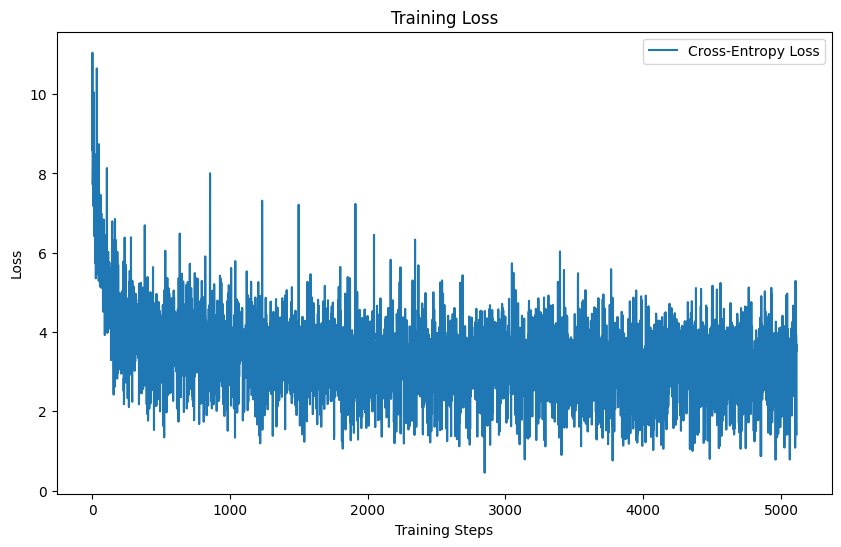

In [ ]:
steps=[0]*5115
print(loss)
for i in range(5115):
  steps[i]=i
plt.figure(figsize=(10, 6))
plt.plot(steps, loss, label='Cross-Entropy Loss')
# plt.plot(steps, loss_co_values, label='Additional Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Ending



In [ ]:
import os
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BartTokenizer,BartForConditionalGeneration

# Set CUDA device
# torch.cuda.set_device(2)

from google.colab import drive

drive.mount('/content/drive')

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# Load tokenizer and model
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
model.config.output_past = True
model.to('cuda').eval()

# Load model checkpoint from Google Drive
checkpoint_path = "/content/drive/My Drive/checkpoints/checkpoint.pth"  # Adjust the path accordingly
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print('Loaded checkpoint from Google Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cuda


RuntimeError: Error(s) in loading state_dict for BartForConditionalGeneration:
	Missing key(s) in state_dict: "final_logits_bias". 

In [ ]:
import nltk
from nltk.translate.bleu_score import corpus_bleu

test_text_file = '/content/testtext (1).txt'
test_labels_file = '/content/testlabels (1).txt'

with open(test_text_file, 'r', encoding='utf-8') as file:
    test_text = file.readlines()

with open(test_labels_file, 'r', encoding='utf-8') as file:
    test_labels = [line.strip().split(' ') for line in file]

preds = []
references = []
for text, labels in zip(test_text, test_labels):
    input_ids = tokenizer.encode(text, return_tensors='pt').to(device)
    generated_ids = model.generate(input_ids, num_beams=5, max_length=30)
    pred_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)
    preds.append(pred_text)
    references.append(labels)

bleu_score = corpus_bleu(references, preds)
print('BLEU Score:', bleu_score)


0
came here
1


AttributeError: 'Tensor' object has no attribute 'get'

In [ ]:
new_sentence = "This is a new sentence to predict labels for."

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
tokenized_sentence = tokenizer.encode(new_sentence, return_tensors='pt')

model = BartForMaskedLM.from_pretrained("facebook/bart-base")
model.config.output_past = True
model.eval()

generated_ids = model.generate(tokenized_sentence.to(device), num_beams=5, max_length=30)
predicted_sentence = tokenizer.decode(generated_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)

print("Predicted labels for the new sentence:", predicted_sentence)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)